In [ ]:
# Install necessary libraries
!pip install geopandas matplotlib contextily folium mapclassify pysal esda seaborn scikit-learn

# Import libraries
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contextily as ctx
import folium
from folium.plugins import HeatMap
import seaborn as sns
from shapely.geometry import Point
import os
from datetime import datetime
import zipfile
from google.colab import files

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.8/142.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.3/61.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.9/47.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.6/141.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.9/53.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 701.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [ ]:
import shutil
import os

# Get the current directory
current_dir = os.getcwd()

# Loop through all items in the directory
for item in os.listdir(current_dir):
    item_path = os.path.join(current_dir, item)

    # Check if the item is a directory and remove it
    if os.path.isdir(item_path):
        shutil.rmtree(item_path)  # Remove the folder and its contents
        print(f"Folder removed: {item}")

    # Check if the item is a zip file and remove it
    elif item.endswith(".zip") and os.path.isfile(item_path):
        os.remove(item_path)  # Remove the zip file
        print(f"Zip file removed: {item}")

print("All folders and zip files removed successfully!")


Folder removed: .config
Folder removed: sample_data
All folders and zip files removed successfully!


In [ ]:
# Upload the zip file
uploaded = files.upload()  # This will prompt you to upload your zip file

# Extract the uploaded zip file
for filename in uploaded.keys():
    zipfile.ZipFile(filename).extractall('.')
    print(f'Extracted {filename}')

Saving Crime Events.zip to Crime Events.zip
Extracted Crime Events.zip


In [ ]:
import os

# List the extracted files and folders
extracted_files = os.listdir('.')
print(extracted_files)
os.listdir('Crime Events')

['Crime Events', 'Crime Events.zip']


['sf_robbery.dbf',
 'sf_vandalism.prj',
 'sf_vandalism.shx',
 'sf_robbery.sbx',
 'sf_cartheft.shp',
 'sf_robbery.sbn',
 'sf_vandalism.shp.xml',
 'sf_robbery.shp',
 'sf_cartheft.dbf',
 'sf_robbery.prj',
 'sf_drugs.shp',
 'sf_drugs.prj',
 'sf_vandalism.sbx',
 'sf_drugs.sbn',
 'sf_cartheft.shp.xml',
 'sf_robbery.shx',
 'sf_cartheft.sbn',
 'sf_cartheft.sbx',
 'sf_vandalism.shp',
 'sf_cartheft.shx',
 'sf_vandalism.dbf',
 'sf_drugs.dbf',
 'sf_cartheft.prj',
 'sf_drugs.shp.xml',
 'sf_robbery.shp.xml',
 'sf_drugs.sbx',
 'sf_vandalism.sbn',
 'sf_drugs.shx']

In [ ]:
 # Load the shapefile (change filename as needed)
file_path = "Crime Events/sf_drugs.shp"
gdf = gpd.read_file(file_path)

# Display the first 5 rows
print(gdf.head())


   IncidntNum          X_pr          Y_pr       Category  \
0   120517836  6.012626e+06  2.091249e+06  DRUG/NARCOTIC   
1   120517836  6.012626e+06  2.091249e+06  DRUG/NARCOTIC   
2   120517836  6.012626e+06  2.091249e+06  DRUG/NARCOTIC   
3   120518602  6.007794e+06  2.112710e+06  DRUG/NARCOTIC   
4   120519490  6.015915e+06  2.095461e+06  DRUG/NARCOTIC   

                    Descript DayOfWeek       Date       Time  PdDistrict  \
0    POSSESSION OF MARIJUANA    Sunday 2012-07-01 1899-12-30     BAYVIEW   
1    POSSESSION OF MARIJUANA    Sunday 2012-07-01 1899-12-30     BAYVIEW   
2    POSSESSION OF MARIJUANA    Sunday 2012-07-01 1899-12-30     BAYVIEW   
3  SALE OF BASE/ROCK COCAINE    Sunday 2012-07-01 1899-12-30  TENDERLOIN   
4      POSSESSION OF COCAINE    Monday 2012-07-02 1899-12-30     BAYVIEW   

       Resolution                     Location           X          Y  \
0   ARREST, CITED         0 Block of EXETER ST -122.398452  37.722882   
1   ARREST, CITED         0 Block of

In [ ]:
 # Load the shapefile (change filename as needed)
file_path = "Crime Events/sf_cartheft.shp"
gdf = gpd.read_file(file_path)

# Display the first 5 rows
print(gdf.head())


   IncidntNum          X_pr          Y_pr       Category  \
0   120522283  5.983168e+06  2.090432e+06  VEHICLE THEFT   
1   120520118  6.007012e+06  2.113804e+06  VEHICLE THEFT   
2   120533688  5.993710e+06  2.113454e+06  VEHICLE THEFT   
3   120533688  5.993710e+06  2.113454e+06  VEHICLE THEFT   
4   120533688  5.993710e+06  2.113454e+06  VEHICLE THEFT   

                       Descript DayOfWeek       Date       Time PdDistrict  \
0      ATTEMPTED STOLEN VEHICLE    Monday 2012-07-02 1899-12-30    TARAVAL   
1                  STOLEN TRUCK    Sunday 2012-07-01 1899-12-30   NORTHERN   
2  STOLEN AND RECOVERED VEHICLE    Friday 2012-07-06 1899-12-30   RICHMOND   
3  STOLEN AND RECOVERED VEHICLE    Friday 2012-07-06 1899-12-30   RICHMOND   
4  STOLEN AND RECOVERED VEHICLE    Friday 2012-07-06 1899-12-30   RICHMOND   

       Resolution                      Location           X          Y  \
0            NONE  SKYLINEBLVD HY / JOHNMUIR DR -122.500220  37.718954   
1            NONE     

Combine 4 files "Crime Events/sf_drugs.shp", "Crime Events/sf_cartheft.shp", "Crime Events/sf_vandalism.shp" and "Crime Events/sf_robbery.shp" into 1 file and saved in combined_gdf

In [ ]:
# Load each shapefile
sf_drugs = gpd.read_file("Crime Events/sf_drugs.shp")
sf_cartheft = gpd.read_file("Crime Events/sf_cartheft.shp")
sf_vandalism = gpd.read_file("Crime Events/sf_vandalism.shp")
sf_robbery = gpd.read_file("Crime Events/sf_robbery.shp")

# Now combine the data into a single GeoDataFrame
combined_gdf = pd.concat([sf_drugs, sf_cartheft, sf_vandalism, sf_robbery])

# Check the first few rows of the combined data
print(combined_gdf.head())


   IncidntNum          X_pr          Y_pr       Category  \
0   120517836  6.012626e+06  2.091249e+06  DRUG/NARCOTIC   
1   120517836  6.012626e+06  2.091249e+06  DRUG/NARCOTIC   
2   120517836  6.012626e+06  2.091249e+06  DRUG/NARCOTIC   
3   120518602  6.007794e+06  2.112710e+06  DRUG/NARCOTIC   
4   120519490  6.015915e+06  2.095461e+06  DRUG/NARCOTIC   

                    Descript DayOfWeek       Date       Time  PdDistrict  \
0    POSSESSION OF MARIJUANA    Sunday 2012-07-01 1899-12-30     BAYVIEW   
1    POSSESSION OF MARIJUANA    Sunday 2012-07-01 1899-12-30     BAYVIEW   
2    POSSESSION OF MARIJUANA    Sunday 2012-07-01 1899-12-30     BAYVIEW   
3  SALE OF BASE/ROCK COCAINE    Sunday 2012-07-01 1899-12-30  TENDERLOIN   
4      POSSESSION OF COCAINE    Monday 2012-07-02 1899-12-30     BAYVIEW   

       Resolution                     Location           X          Y  \
0   ARREST, CITED         0 Block of EXETER ST -122.398452  37.722882   
1   ARREST, CITED         0 Block of

The combined_gdf contains 13472 rows and 14 columns.

In [ ]:
combined_gdf.shape

(13472, 14)

+ combined_gdf is using EPSG:2227, which corresponds to NAD83 / California zone 3 (ftUS), a projected coordinate system (PCS) commonly used for spatial data in California.
+ Since it is in a projected CRS, the geometry column contains X, Y coordinates in feet instead of the usual longitude and latitude. We may need to convert to other crs in later analysis.WGS84 (EPSG:4326)

In [ ]:
# Check CRS of the GeoDataFrame
print(combined_gdf.crs)

# Checking unique values of the geometry column to see if all data uses the same CRS
print(combined_gdf['geometry'].unique())

EPSG:2227
<GeometryArray>
[<POINT (6012626.013 2091248.872)>,  <POINT (6007794.22 2112710.375)>,
   <POINT (6015915.4 2095461.293)>,         <POINT (6008228 2112063)>,
         <POINT (6008132 2112745)>, <POINT (6011311.724 2118677.533)>,
  <POINT (6007127.974 2113287.26)>,         <POINT (6009146 2112451)>,
  <POINT (5997170.855 2108452.51)>, <POINT (6009647.816 2113301.306)>,
 ...
 <POINT (5985587.822 2105316.671)>, <POINT (6007587.306 2103828.586)>,
 <POINT (6002273.159 2100659.105)>,         <POINT (6010000 2102800)>,
  <POINT (6011001.49 2114201.819)>, <POINT (6011201.872 2112624.319)>,
 <POINT (6012079.772 2114411.263)>, <POINT (6010633.303 2098319.714)>,
  <POINT (6008222.22 2113116.375)>,   <POINT (6012160.22 2096944.04)>]
Length: 7282, dtype: geometry


In [ ]:
print(combined_gdf[['X', 'Y']].head())

            X          Y
0 -122.398452  37.722882
1 -122.398452  37.722882
2 -122.398452  37.722882
3 -122.416674  37.781540
4 -122.387375  37.734631


The X_pr and Y_pr columns will be removed due to redundancy, as they duplicate the spatial information already contained in the geometry column. The geometry column will be retained as it is essential for mapping and spatial analysis in GIS. Additionally, the X and Y columns (likely in WGS84 - EPSG:4326) will be kept, as they provide a convenient format for non-GIS tools such as Google Maps.

In [ ]:
combined_gdf = combined_gdf.drop(columns=["X_pr", "Y_pr"])
combined_gdf.head()

IncidntNum       Category                   Descript DayOfWeek       Date  \
0   120517836  DRUG/NARCOTIC    POSSESSION OF MARIJUANA    Sunday 2012-07-01   
1   120517836  DRUG/NARCOTIC    POSSESSION OF MARIJUANA    Sunday 2012-07-01   
2   120517836  DRUG/NARCOTIC    POSSESSION OF MARIJUANA    Sunday 2012-07-01   
3   120518602  DRUG/NARCOTIC  SALE OF BASE/ROCK COCAINE    Sunday 2012-07-01   
4   120519490  DRUG/NARCOTIC      POSSESSION OF COCAINE    Monday 2012-07-02   

        Time  PdDistrict      Resolution                     Location  \
0 1899-12-30     BAYVIEW   ARREST, CITED         0 Block of EXETER ST   
1 1899-12-30     BAYVIEW   ARREST, CITED         0 Block of EXETER ST   
2 1899-12-30     BAYVIEW   ARREST, CITED         0 Block of EXETER ST   
3 1899-12-30  TENDERLOIN  ARREST, BOOKED  300 Block of GOLDEN GATE AV   
4 1899-12-30     BAYVIEW  ARREST, BOOKED        1200 Block of LANE ST   

            X          Y                         geometry  
0 -122.398452  37.722882  POINT (6012626.013 2091248.872)  
1 -122.398452  37.722882  POINT (6012626.013 2091248.872)  
2 -122.398452  37.722882  POINT (6012626.013 2091248.872)  
3 -122.416674  37.781540   POINT (6007794.22 2112710.375)  
4 -122.387375  37.734631    POINT (6015915.4 2095461.293)

More specifically it includes the following variables.

+ Dates - timestamp of the crime incident
+ Category - category of the crime incident. (This is our target variable.)
+ Descript - detailed description of the crime incident
+ DayOfWeek - the day of the week
+ PdDistrict - the name of the Police Department District
+ Resolution - The resolution of the crime incident
+ Location - the approximate street address of the crime incident
+ X - Longitude
+ Y - Latitude
+ Time column is useless

The dataset covers six months (July 1, 2012 to December 31, 2012). This crime data represents the second half of 2012.

In [ ]:
combined_gdf['Date'] = pd.to_datetime(combined_gdf['Date'])  # Make sure the 'Date' column is in datetime format

# Print the first and last date
first_date = combined_gdf['Date'].min()
last_date = combined_gdf['Date'].max()

print(f"First date: {first_date}")
print(f"Last date: {last_date}")


First date: 2012-07-01 00:00:00
Last date: 2012-12-31 00:00:00


Upon initial inspection, the Time column contains only a single value (1899-12-30 00:00:00), which does not represent meaningful time data for the analysis. Given its redundancy and lack of valuable information, the Time column is removed from the dataset to ensure data integrity.

In [ ]:
# Check unique values in the Time column
print(combined_gdf['Time'].unique())

# Check the first few rows of the Time column
print(combined_gdf['Time'].head())

<DatetimeArray>
['1899-12-30 00:00:00']
Length: 1, dtype: datetime64[ms]
0   1899-12-30
1   1899-12-30
2   1899-12-30
3   1899-12-30
4   1899-12-30
Name: Time, dtype: datetime64[ms]


In [ ]:
combined_gdf = combined_gdf.drop(columns=["Time"])
combined_gdf.head()

IncidntNum       Category                   Descript DayOfWeek       Date  \
0   120517836  DRUG/NARCOTIC    POSSESSION OF MARIJUANA    Sunday 2012-07-01   
1   120517836  DRUG/NARCOTIC    POSSESSION OF MARIJUANA    Sunday 2012-07-01   
2   120517836  DRUG/NARCOTIC    POSSESSION OF MARIJUANA    Sunday 2012-07-01   
3   120518602  DRUG/NARCOTIC  SALE OF BASE/ROCK COCAINE    Sunday 2012-07-01   
4   120519490  DRUG/NARCOTIC      POSSESSION OF COCAINE    Monday 2012-07-02   

   PdDistrict      Resolution                     Location           X  \
0     BAYVIEW   ARREST, CITED         0 Block of EXETER ST -122.398452   
1     BAYVIEW   ARREST, CITED         0 Block of EXETER ST -122.398452   
2     BAYVIEW   ARREST, CITED         0 Block of EXETER ST -122.398452   
3  TENDERLOIN  ARREST, BOOKED  300 Block of GOLDEN GATE AV -122.416674   
4     BAYVIEW  ARREST, BOOKED        1200 Block of LANE ST -122.387375   

           Y                         geometry  
0  37.722882  POINT (6012626.013 2091248.872)  
1  37.722882  POINT (6012626.013 2091248.872)  
2  37.722882  POINT (6012626.013 2091248.872)  
3  37.781540   POINT (6007794.22 2112710.375)  
4  37.734631    POINT (6015915.4 2095461.293)

Check for missing values and duplicates:

 + No missing values in dataset
 + The dataset contains 3,319 duplicated rows. These duplicates were removed to ensure the integrity and accuracy of the analysis.

In [ ]:
# 3. Missing Values: Check for missing values in the dataset
print("\nMissing Values")
print(combined_gdf.isnull().sum())  # Sum of missing values per column
# 4. Duplicates: Check for duplicate rows
print("\nDuplicate Rows")
duplicates = combined_gdf[combined_gdf.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")  # Count of duplicate rows


Missing Values
IncidntNum    0
Category      0
Descript      0
DayOfWeek     0
Date          0
PdDistrict    0
Resolution    0
Location      0
X             0
Y             0
geometry      0
dtype: int64

Duplicate Rows
Number of duplicate rows: 3319


In [ ]:
# Remove duplicates
combined_gdf = combined_gdf.drop_duplicates()

# Check if duplicates are removed
print(f"Number of rows after removing duplicates: {combined_gdf.shape[0]}")

# Optionally, check for duplicates again to make sure
duplicates_after_removal = combined_gdf[combined_gdf.duplicated()]
print(f"Number of duplicate rows after removal: {duplicates_after_removal.shape[0]}")
# Check the number of rows and columns after removing duplicates
print(f"Number of rows and columns after cleaning: {combined_gdf.shape}")

# Print the names of all variables (columns) in the dataset
print(combined_gdf.columns)
print(combined_gdf.shape)

Number of rows after removing duplicates: 10153
Number of duplicate rows after removal: 0
Number of rows and columns after cleaning: (10153, 11)
Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'PdDistrict',
       'Resolution', 'Location', 'X', 'Y', 'geometry'],
      dtype='object')
(10153, 11)


After addressing the variables, missing values, duplicates, and redundancy, the cleaned dataset now consists of 10,153 rows and 11 columns.

**Evaluate the position of the data points using the coordinates to identify any misplaced points**

+ The geographical position of the data points was evaluated to identify any misplaced coordinates. The expected coordinate range for San Francisco was defined based on the central latitude and longitude values (37.773972, -122.431297) from https://www.latlong.net/place/san-francisco-ca-usa-594.html. Data points falling outside the defined bounds were flagged as potential errors or outliers, ensuring that the data points are correctly located within the geographical area of interest.
+ **Result**: No data points fall outside the expected geographical range for San Francisco, suggesting that all coordinates are correctly positioned within the defined bounds.

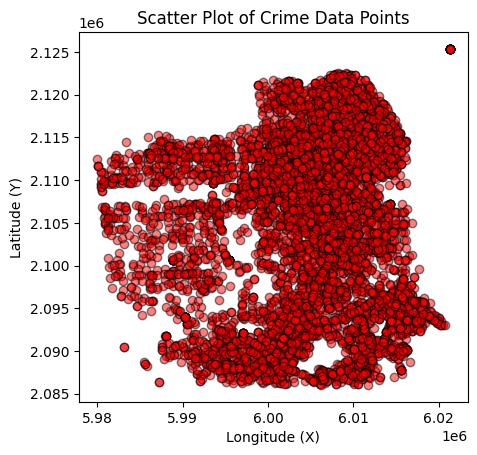

In [ ]:
# Plot the crime locations on a simple map
# Plot the coordinates (X, Y)
combined_gdf.plot(marker='o', color='red', alpha=0.5, edgecolor='black')
#plt.scatter(combined_gdf['X'], combined_gdf['Y'], alpha=0.5, c='red', marker='o',edgecolor='black')
plt.title('Scatter Plot of Crime Data Points')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')
plt.show()

In [ ]:
!pip install geodatasets

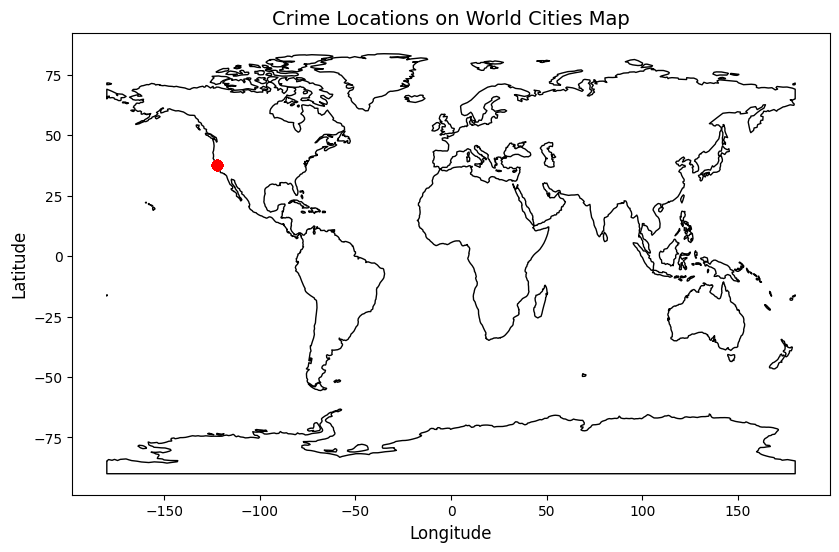

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt
# Import geodatasets
import geodatasets

# Function to create GeoDataFrame
def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf['X'], gdf['Y']))
    gdf['Coordinates'] = gdf['Coordinates'].apply(Point)
    # Use modern CRS syntax (remove deprecated '+init' syntax)
    gdf = gpd.GeoDataFrame(gdf, geometry='Coordinates', crs="EPSG:4326")
    return gdf

# Assuming combined_gdf is your DataFrame with 'X' and 'Y' columns
# If not, here's an example to create it (replace with your actual data)

# Create GeoDataFrame
train_gdf = create_gdf(combined_gdf)

# Load world cities dataset from geodatasets
# Note: geodatasets provides various datasets; we'll use 'naturalearth.cities'
world = gpd.read_file(geodatasets.get_path('naturalearth.land'))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='white', edgecolor='black')  # Plot world cities as background
train_gdf.plot(ax=ax, color='red', markersize=50)   # Plot crime locations in red
plt.title('Crime Locations on World Cities Map', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.show()

In [ ]:
# San Francisco coordinates range based on the provided central location
min_x, max_x = -123.0, -122.3  # Longitude range for San Francisco
min_y, max_y = 37.6, 37.9      # Latitude range for San Francisco

# Check for out-of-bounds points
out_of_bounds = combined_gdf[(combined_gdf['X'] < min_x) | (combined_gdf['X'] > max_x) |
                             (combined_gdf['Y'] < min_y) | (combined_gdf['Y'] > max_y)]

# Show the out-of-bounds points
print(out_of_bounds)

Empty GeoDataFrame
Columns: [IncidntNum, Category, Descript, DayOfWeek, Date, PdDistrict, Resolution, Location, X, Y, geometry]
Index: []


**Analysis**

**Summary Statistics**

In [ ]:
# 1. Basic Info: Get an overview of the dataset (rows, columns, data types)
print("Basic Info")
print(combined_gdf.info())  # This gives the number of rows, columns, and data types


Basic Info
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 10153 entries, 0 to 2760
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   IncidntNum  10153 non-null  int64         
 1   Category    10153 non-null  object        
 2   Descript    10153 non-null  object        
 3   DayOfWeek   10153 non-null  object        
 4   Date        10153 non-null  datetime64[ms]
 5   PdDistrict  10153 non-null  object        
 6   Resolution  10153 non-null  object        
 7   Location    10153 non-null  object        
 8   X           10153 non-null  float64       
 9   Y           10153 non-null  float64       
 10  geometry    10153 non-null  geometry      
dtypes: datetime64[ms](1), float64(2), geometry(1), int64(1), object(6)
memory usage: 951.8+ KB
None


In [ ]:
print("______________Summary statistics______________")
print(combined_gdf.describe())

print("____________Unique categories in columns____________")
print(combined_gdf.nunique())

print("______________Crime categories________________")
print(combined_gdf['Category'].value_counts())


______________Summary statistics______________
         IncidntNum                        Date             X             Y
count  1.015300e+04                       10153  10153.000000  10153.000000
mean   1.220072e+08  2012-09-30 03:54:18.189000   -122.423878     37.763965
min    1.000955e+08         2012-07-01 00:00:00   -122.513023     37.708154
25%    1.206753e+08         2012-08-17 00:00:00   -122.435219     37.745032
50%    1.208306e+08         2012-10-01 00:00:00   -122.417999     37.771268
75%    1.209789e+08         2012-11-13 00:00:00   -122.407855     37.783087
max    9.605622e+08         2012-12-31 00:00:00   -122.370713     37.817046
std    2.045794e+07                         NaN      0.024937      0.025185
____________Unique categories in columns____________
IncidntNum    10140
Category          4
Descript        106
DayOfWeek         7
Date            184
PdDistrict       10
Resolution       13
Location       5617
X              7260
Y              7271
geometry       7


**Visualizing Categorical Data**

**Incidents per crime category**

The most frequent crime type is Vadalism (3,897 cases), followed by Vehicle Theftand Robbery.

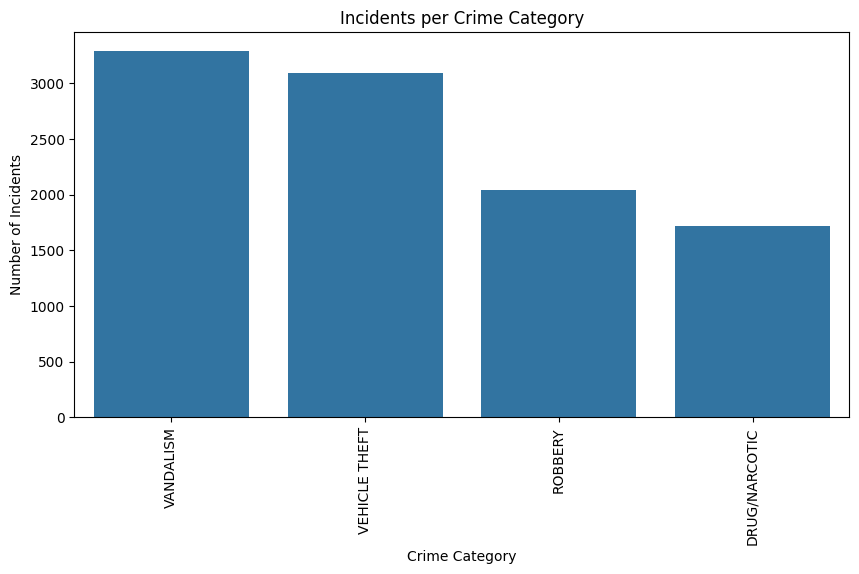

In [ ]:
# Plot the distribution of incidents per crime category
plt.figure(figsize=(10,5))
sns.barplot(x=combined_gdf['Category'].value_counts().index,
            y=combined_gdf['Category'].value_counts().values)
plt.xticks(rotation=90)
plt.title("Incidents per Crime Category")
plt.xlabel("Crime Category")
plt.ylabel("Number of Incidents")
plt.show()


**Distribution of Resolutions for Crime Cases**

Since "NONE" has a significantly higher count than the others, using a log scale on the y-axis to make the differences clearer.

**Results:**
+ The majority of cases (8,018 cases) have no resolution ("NONE"), which could indicate unsolved or ongoing cases.
+ "Arrest, Booked" (1,682 cases) is the most common resolution where action was taken.
+ Other resolutions like "Juvenile Booked" (60 cases) or "District Attorney Refuses to Prosecute" (9 cases) occur much less frequently


In [ ]:
combined_gdf['Resolution'].value_counts()

Resolution
NONE                                      8018
ARREST, BOOKED                            1682
ARREST, CITED                              201
UNFOUNDED                                  129
JUVENILE BOOKED                             60
JUVENILE CITED                              25
COMPLAINANT REFUSES TO PROSECUTE            11
DISTRICT ATTORNEY REFUSES TO PROSECUTE       9
PSYCHOPATHIC CASE                            8
JUVENILE ADMONISHED                          5
CLEARED-CONTACT JUVENILE FOR MORE INFO       2
EXCEPTIONAL CLEARANCE                        2
NOT PROSECUTED                               1
Name: count, dtype: int64

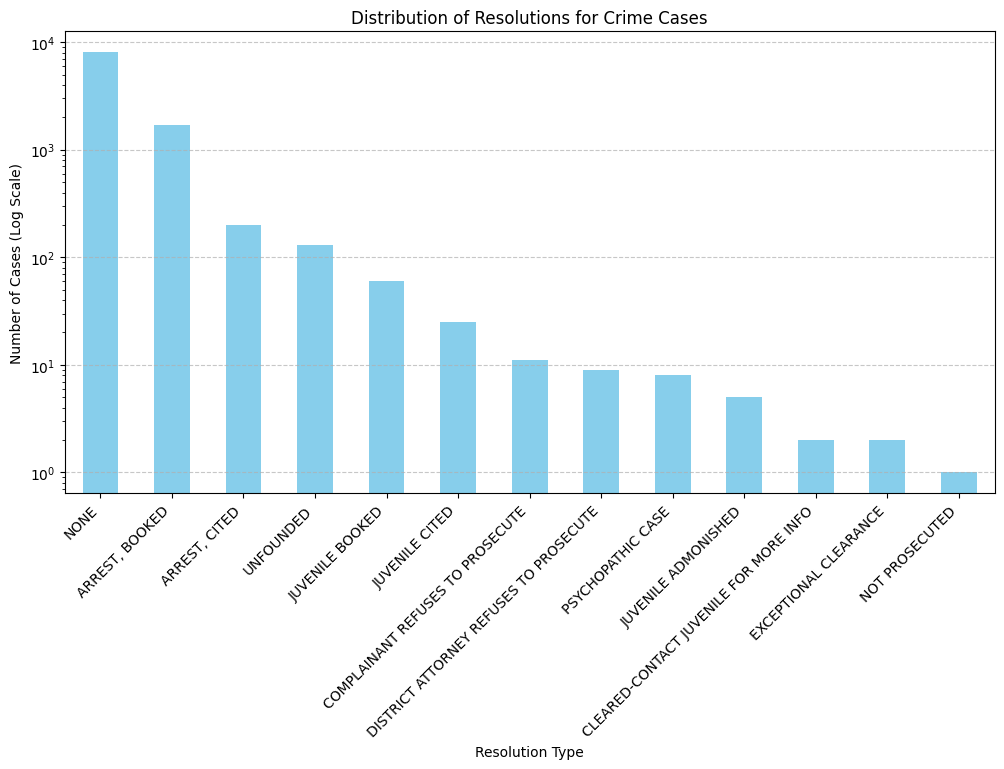

In [ ]:
import matplotlib.pyplot as plt

# Plot the resolution distribution
resolution_counts = combined_gdf['Resolution'].value_counts()

plt.figure(figsize=(12, 6))
resolution_counts.plot(kind='bar', color='skyblue')
plt.yscale("log")  # Apply log scale for better visualization
plt.title("Distribution of Resolutions for Crime Cases")
plt.xlabel("Resolution Type")
plt.ylabel("Number of Cases (Log Scale)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Time Series Analysis**

**Crime Trends Over Time (daily)**

+ The graph clearly shows a fluctuating pattern throughout the six-month period, indicating that the number of crimes varies significantly from day to day.
+ The noticeable spike around mid-October (the highest in the period) and the decrease in crime towards the end of December 2012 both require further investigation.


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import statsmodels.api as sm


df = combined_gdf.copy()

# Aggregate by week
df['Week'] = df['Date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_counts = df.groupby('Week').size().reset_index(name='Count')

# Add rolling average (7-week window)
weekly_counts['Rolling_Avg'] = weekly_counts['Count'].rolling(window=7, min_periods=1, center=True).mean()

# Perform seasonal decomposition
if len(weekly_counts) >= 14:
    decomposition = sm.tsa.seasonal_decompose(weekly_counts['Count'],
                                            model='additive',
                                            period=4,
                                            extrapolate_trend='freq')
    weekly_counts['Trend'] = decomposition.trend
    weekly_counts['Seasonal'] = decomposition.seasonal
else:
    weekly_counts['Trend'] = weekly_counts['Rolling_Avg']
    weekly_counts['Seasonal'] = 0

# Create figure with subplots
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=('Weekly Incident Counts & Rolling Average',
                                 'Trend Component',
                                 'Seasonal Component'),
                   vertical_spacing=0.12)

# Raw counts with rolling average
fig.add_trace(
    go.Scatter(
        x=weekly_counts['Week'],
        y=weekly_counts['Count'],
        mode='markers',
        marker=dict(size=10, color=weekly_counts['Count'], colorscale='Viridis', showscale=True),
        name='Weekly Incidents',
        hovertemplate='Week: %{x|%Y-%m-%d}<br>Count: %{y}'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=weekly_counts['Week'],
        y=weekly_counts['Rolling_Avg'],
        mode='lines',
        line=dict(color='#FF4444', width=3),
        name='7-Week Rolling Avg',
        hovertemplate='Week: %{x|%Y-%m-%d}<br>Rolling Avg: %{y:.1f}'
    ),
    row=1, col=1
)

# Trend component
fig.add_trace(
    go.Scatter(
        x=weekly_counts['Week'],
        y=weekly_counts['Trend'],
        mode='lines',
        line=dict(color='#00CC96', width=4, dash='dash'),
        name='Trend',
        hovertemplate='Week: %{x|%Y-%m-%d}<br>Trend: %{y:.1f}',
        fill='tozeroy',
        fillcolor='rgba(0,204,150,0.2)'
    ),
    row=2, col=1
)

# Seasonal component
fig.add_trace(
    go.Scatter(
        x=weekly_counts['Week'],
        y=weekly_counts['Seasonal'],
        mode='lines',
        line=dict(color='#EF553B', width=3),
        name='Seasonal',
        hovertemplate='Week: %{x|%Y-%m-%d}<br>Seasonal: %{y:.1f}'
    ),
    row=3, col=1
)

# Update layout with light theme
fig.update_layout(
    title={
        'text': "<b>Time Series Analysis: All Reported Incidents</b>",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=28, color='#333333', family='Arial')
    },
    template='plotly_white',
    height=1000,
    width=1300,
    plot_bgcolor='white',
    paper_bgcolor='white',
    margin=dict(l=80, r=80, t=150, b=80),
    hovermode='x unified',
    hoverlabel=dict(bgcolor='rgba(255,255,255,0.9)',
                   font_size=14,
                   font_color='#333333',
                   bordercolor='#666666'),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5,
        font=dict(size=16, color='#333333'),
        bgcolor='rgba(255,255,255,0.8)',
        bordercolor='#666666',
        borderwidth=1
    ),
    showlegend=True
)

# Update axes with light theme styling
for i in range(1, 4):
    fig.update_xaxes(
        title_text="<b>Week Starting</b>" if i == 3 else "",
        title_font=dict(size=20, color='#333333'),
        tickfont=dict(size=14, color='#333333'),
        tickformat='%Y-%m-%d',
        gridcolor='rgba(0,0,0,0.1)',
        zerolinecolor='rgba(0,0,0,0.2)',
        showspikes=True,
        spikecolor='#666666',
        spikethickness=1,
        row=i, col=1
    )

fig.update_yaxes(
    title_text="<b>Incident Count</b>",
    title_font=dict(size=20, color='#333333'),
    tickfont=dict(size=14, color='#333333'),
    gridcolor='rgba(0,0,0,0.1)',
    zerolinecolor='rgba(0,0,0,0.2)',
    row=1, col=1
)
fig.update_yaxes(
    title_text="<b>Trend</b>",
    title_font=dict(size=20, color='#00CC96'),
    tickfont=dict(size=14, color='#00CC96'),
    gridcolor='rgba(0,0,0,0.1)',
    zerolinecolor='rgba(0,0,0,0.2)',
    row=2, col=1
)
fig.update_yaxes(
    title_text="<b>Seasonal</b>",
    title_font=dict(size=20, color='#EF553B'),
    tickfont=dict(size=14, color='#EF553B'),
    gridcolor='rgba(0,0,0,0.1)',
    zerolinecolor='rgba(0,0,0,0.2)',
    row=3, col=1
)

# Add annotation
fig.add_annotation(
    text="Data: SFPD Crime Reports | Analysis by xAI",
    xref="paper", yref="paper",
    x=0.98, y=0.02,
    showarrow=False,
    font=dict(size=14, color='#666666'),
    align='right'
)

fig.show()

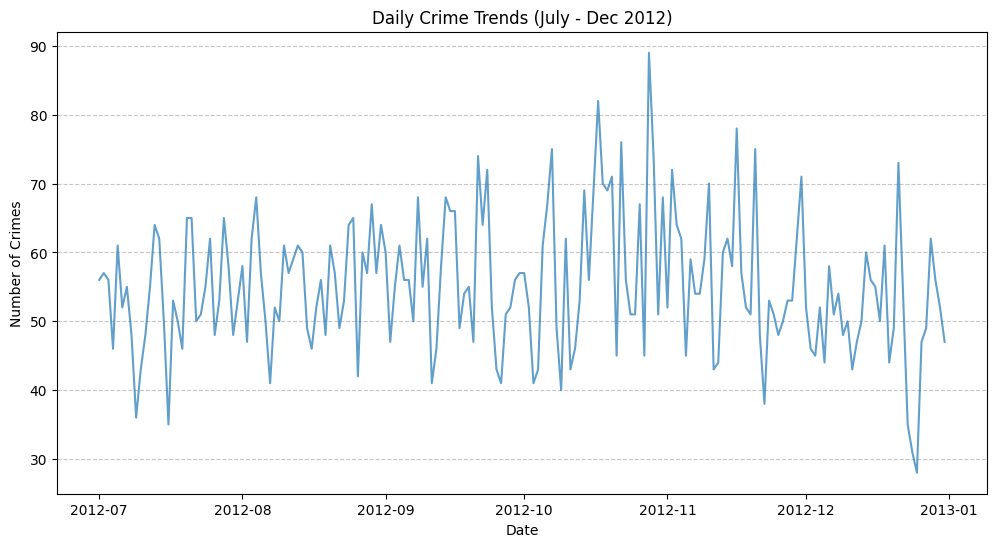

In [ ]:
# Convert Date column to datetime
combined_gdf['Date'] = pd.to_datetime(combined_gdf['Date'])

# Group by date and count occurrences
daily_trend = combined_gdf.groupby("Date").size()

# Plot daily crime trends
plt.figure(figsize=(12, 6))
#daily_trend.plot(kind='line')
plt.plot(daily_trend, label="Daily Crime", alpha=0.7)
plt.title("Daily Crime Trends (July - Dec 2012)")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Anomaly Detection (Identifying Unusual Crime Spikes)**

+ Anomaly detection using Z-score (threshold=2.5) identifies significant crime outliers on 14/09/2012 and 17/10/2012, and a significant dip on 25/12/2012, suggesting unusual crime spikes. Further investigation is needed to determine potential contributing factors like specific events or external influences.

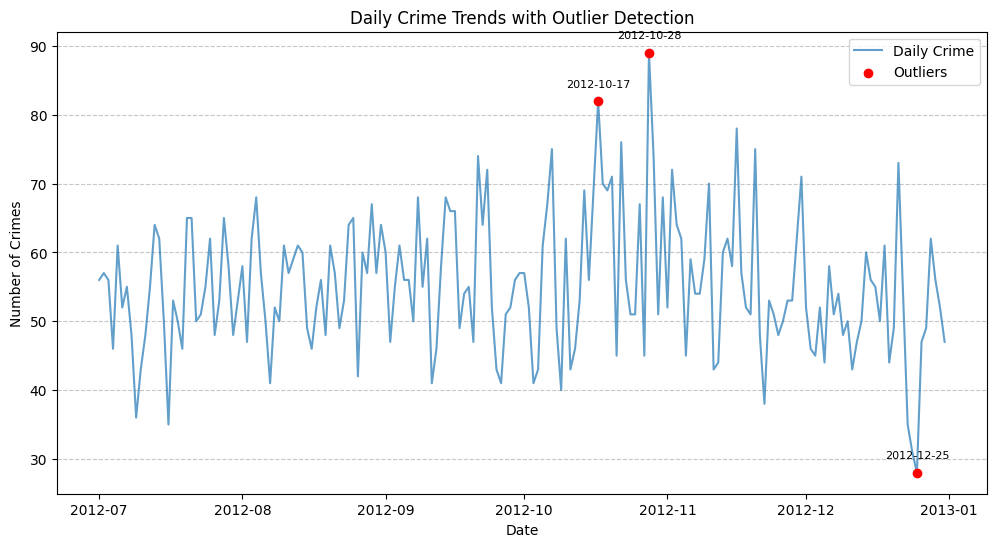

In [ ]:
from scipy.stats import zscore

# Assuming daily_trend is your pandas Series with crime counts and a DatetimeIndex

# Compute Z-scores
z_scores = zscore(daily_trend)
threshold = 2.5  # Set threshold for defining outliers

# Find outlier dates (both high and low)
high_outlier_dates = daily_trend[z_scores > threshold]
low_outlier_dates = daily_trend[z_scores < -threshold]
outlier_dates = pd.concat([high_outlier_dates, low_outlier_dates]).sort_index()  # Combine and sort

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_trend, label="Daily Crime", alpha=0.7)
plt.scatter(outlier_dates.index, outlier_dates, color='red', label="Outliers", zorder=3)

# Add date labels to outliers
for date, value in outlier_dates.items():
    plt.annotate(date.strftime('%Y-%m-%d'),  # Format date as string
                 (date, value),              # Coordinates for annotation
                 textcoords="offset points",  # How to position the text
                 xytext=(0, 10),             # Offset from the point (0 points horizontally, 10 points vertically)
                 ha='center',                # Horizontal alignment
                 fontsize=8)                 # Font size

plt.title("Daily Crime Trends with Outlier Detection")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Distribution of Incidents per Day with Density and Median**

+ The distribution of daily incident counts approximates a normal distribution, centered around a median of 54 incidents per day, with a slight right skew indicating occasional days with higher counts.

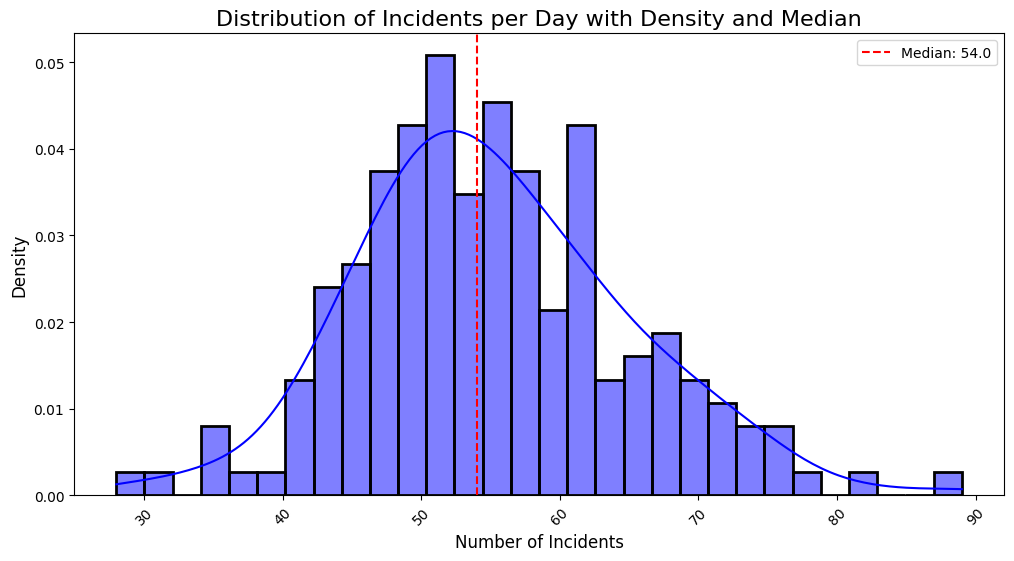

Median of incidents per day: 54.0


In [ ]:
# Convert 'Date' to datetime if not already
combined_gdf['Date'] = pd.to_datetime(combined_gdf['Date'], errors='coerce')

# Count the number of incidents per day
incidents_per_day = combined_gdf.groupby('Date').size()

# Plot the distribution of incidents per day
plt.figure(figsize=(12, 6))

# Plot the histogram with density curve
sns.histplot(incidents_per_day, kde=True, color='blue', bins=30, stat='density', linewidth=2)

# Plot the median line
median_val = incidents_per_day.median()
plt.axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val}')

# Add titles and labels
plt.title('Distribution of Incidents per Day with Density and Median', fontsize=16)
plt.xlabel('Number of Incidents', fontsize=12)  # Changed label here
plt.ylabel('Density', fontsize=12)
plt.legend()

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Print the median value
print(f"Median of incidents per day: {median_val}")

**Crime trends by day of the week**

*   While Friday has the highest crime count, there's a small increase in crime incidents on Saturday and Sunday relative to the weekdays.





<ipython-input-30-f0c431b53a2e>:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



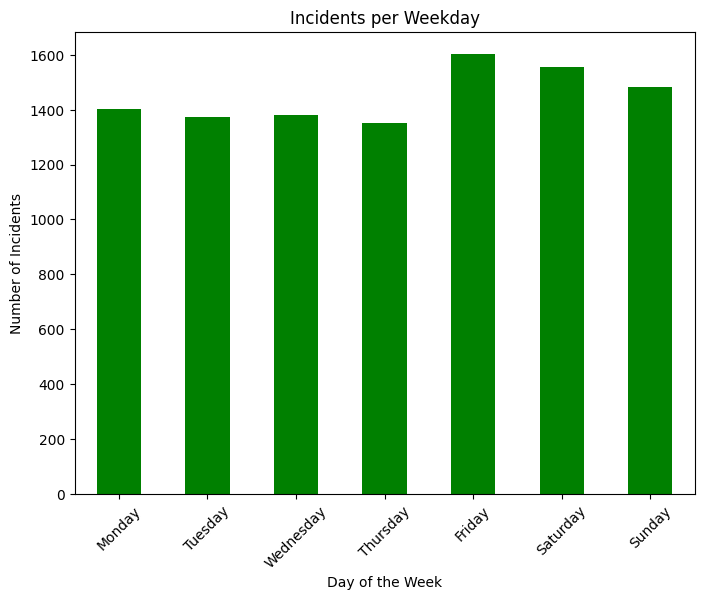

In [ ]:
#2. Incidents per Weekday (Day of the Week)
# Convert 'DayOfWeek' to categorical if not already
combined_gdf['DayOfWeek'] = pd.Categorical(combined_gdf['DayOfWeek'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Count the number of incidents per weekday
incidents_per_weekday = combined_gdf.groupby('DayOfWeek').size()

# Plot the distribution of incidents per weekday
plt.figure(figsize=(8, 6))
incidents_per_weekday.plot(kind='bar', color='green')
plt.title('Incidents per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.show()


<ipython-input-31-d02477e047ab>:14: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-31-d02477e047ab>:96: UserWarning:

Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.



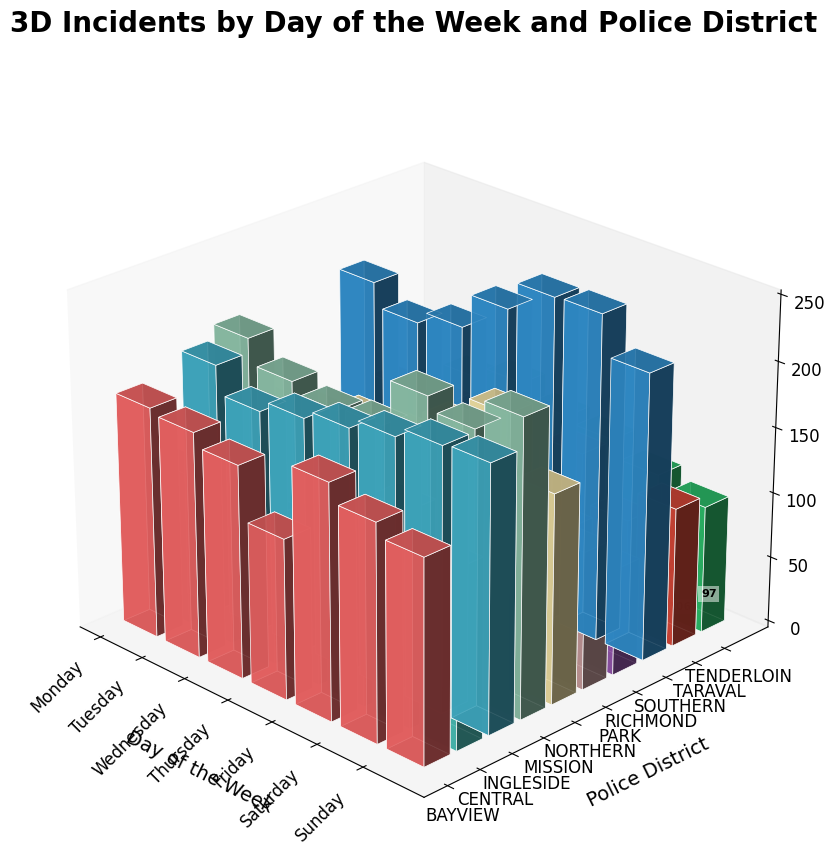

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LinearSegmentedColormap

# Convert 'DayOfWeek' to categorical if not already
combined_gdf['DayOfWeek'] = pd.Categorical(combined_gdf['DayOfWeek'],
                                         categories=['Monday', 'Tuesday', 'Wednesday',
                                                   'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                         ordered=True)

# Group data by DayOfWeek and PdDistrict
grouped_data = combined_gdf.groupby(['DayOfWeek', 'PdDistrict']).size().unstack(fill_value=0)

# Get unique districts and days
days = grouped_data.index
districts = grouped_data.columns
n_days = len(days)
n_districts = len(districts)

# Create custom gradient color scheme (one color per district)
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD', '#D4A5A5', '#9B59B6',
          '#3498DB', '#E74C3C', '#2ECC71']  # Extended color list for multiple districts
cm = LinearSegmentedColormap.from_list('custom', colors[:n_districts], N=n_districts)
gradient_colors = [cm(i/(n_districts-1)) for i in range(n_districts)]

# Set up the figure
fig = plt.figure(figsize=(14, 10), facecolor='white')
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')

# Prepare data for 3D bars
xpos = np.arange(n_days)
ypos = np.arange(n_districts)
xpos, ypos = np.meshgrid(xpos, ypos)
xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros(n_days * n_districts)
dx = np.ones_like(zpos) * 0.8  # Width of bars
dy = np.ones_like(zpos) * 0.8  # Depth of bars
dz = grouped_data.values.T.flatten()  # Height of bars (transposed for districts)

# Create 3D bars
for i in range(n_districts):
    idx = slice(i * n_days, (i + 1) * n_days)
    ax.bar3d(xpos[idx], ypos[idx], zpos[idx], dx[idx], dy[idx], dz[idx],
             color=gradient_colors[i],
             edgecolor='white',
             linewidth=0.5,
             alpha=0.9)

# Customize the plot
ax.set_title('3D Incidents by Day of the Week and Police District',
             fontsize=20,
             color='black',
             pad=40,
             fontweight='bold',
             fontfamily='sans-serif')

# Set labels
ax.set_xlabel('Day of the Week', fontsize=14, color='black', labelpad=15)
ax.set_ylabel('Police District', fontsize=14, color='black', labelpad=15)
ax.set_zlabel('Number of Incidents', fontsize=14, color='black', labelpad=15)

# Customize ticks
ax.set_xticks(np.arange(n_days))
ax.set_xticklabels(days, rotation=45, ha='right', fontsize=12, color='black',
                  fontfamily='sans-serif')
ax.set_yticks(np.arange(n_districts))
ax.set_yticklabels(districts, fontsize=12, color='black', fontfamily='sans-serif')
ax.tick_params(axis='z', labelsize=12, labelcolor='black')

# Add value labels in front of bars (only showing values > 5% of max for clarity)
max_height = dz.max()
for x, y, z in zip(xpos, ypos, dz):
    if z > max_height * 0.05:  # Only label significant values
        ax.text(x + 0.4, y + 0.9, z * 0.1,  # Move to front (y + 0.9) and near base (z * 0.1)
                f'{int(z)}',
                ha='center',
                va='bottom',  # Align bottom to make it readable
                fontsize=8,
                color='black',
                fontweight='bold',
                bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

# Customize view angle
ax.view_init(elev=25, azim=-45)

# Customize appearance
ax.grid(False)
for spine in ax.spines.values():
    spine.set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Crime trends by month**

**! Note**: The y-axis does not start at 0 to better illustrate the relative changes in crime counts across months. Please focus on the trend and relative differences rather than the absolute magnitudes.

+ October shows the highest number of crimes among the six months, indicating a potential peak during this period.
+ There's a noticeable downward trend in crime incidents from October to December, suggesting a possible seasonal or end-of-year effect.

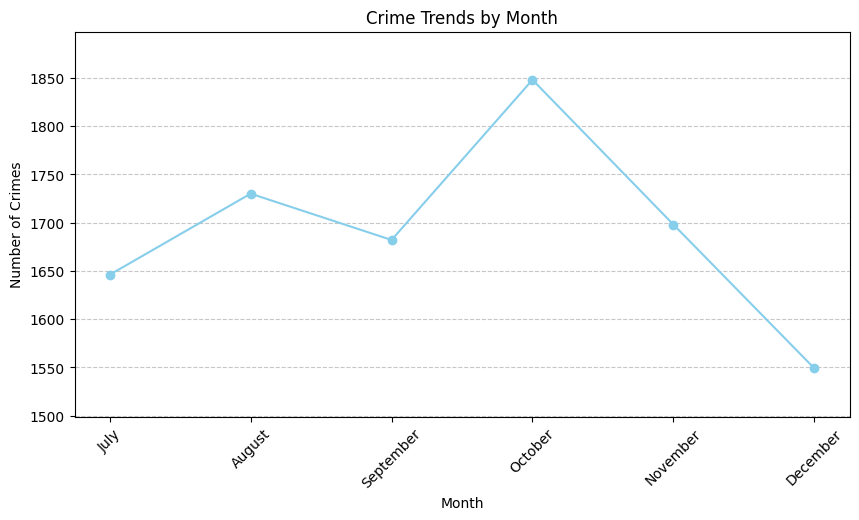

In [ ]:
# Extract month
combined_gdf["Month"] = combined_gdf["Date"].dt.month_name()

# Count occurrences per month
monthly_counts = combined_gdf["Month"].value_counts()

# Sort in calendar order
months_order = ["July", "August", "September", "October", "November", "December"]
monthly_counts = monthly_counts.reindex(months_order)

# Plot as a line chart with adjusted y-axis limits
plt.figure(figsize=(10, 5))
plt.plot(monthly_counts.index, monthly_counts.values, marker='o', linestyle='-', color='skyblue')
plt.title("Crime Trends by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust y-axis limits
ymin = monthly_counts.min() - 50  # Subtract a little for padding
ymax = monthly_counts.max() + 50  # Add a little for padding
plt.ylim(ymin, ymax)

plt.show()

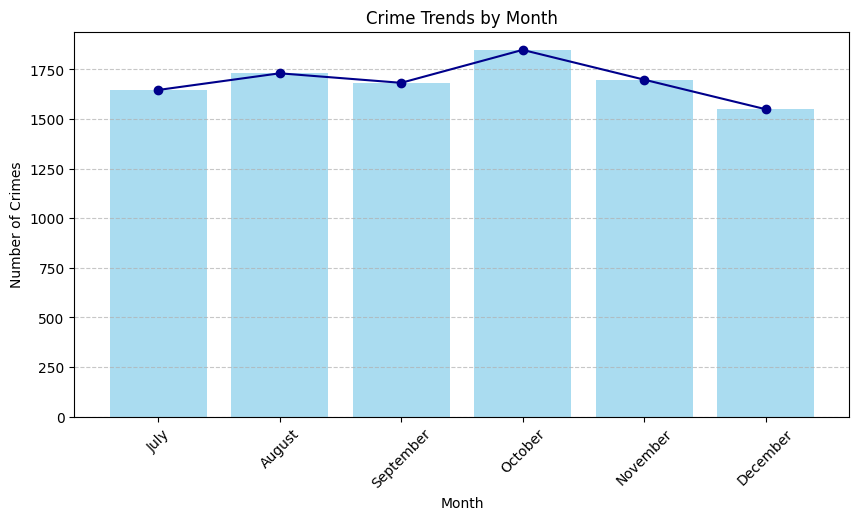

In [ ]:
# Extract month
combined_gdf["Month"] = combined_gdf["Date"].dt.month_name()

# Count occurrences per month
monthly_counts = combined_gdf["Month"].value_counts()

# Sort in calendar order
months_order = ["July", "August", "September", "October", "November", "December"]
monthly_counts = monthly_counts.reindex(months_order)

# Plot as a bar chart with line overlay
plt.figure(figsize=(10, 5))

# Bar chart
plt.bar(monthly_counts.index, monthly_counts.values, color="skyblue", alpha=0.7)

# Line chart overlay
plt.plot(monthly_counts.index, monthly_counts.values, marker="o", color="darkblue")

plt.title("Crime Trends by Month")
plt.xlabel("Month")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

**Moving Average for Crime Trends (Smoothing)**

Rolling average **7-day** line chart.
Smoother trendlines help detect overall patterns without daily noise.

**Result**: While the daily crime data shows significant volatility, the rolling average indicates a relatively stable baseline with a gradual increase towards the later part of the year, culminating in the late October/early November peak.

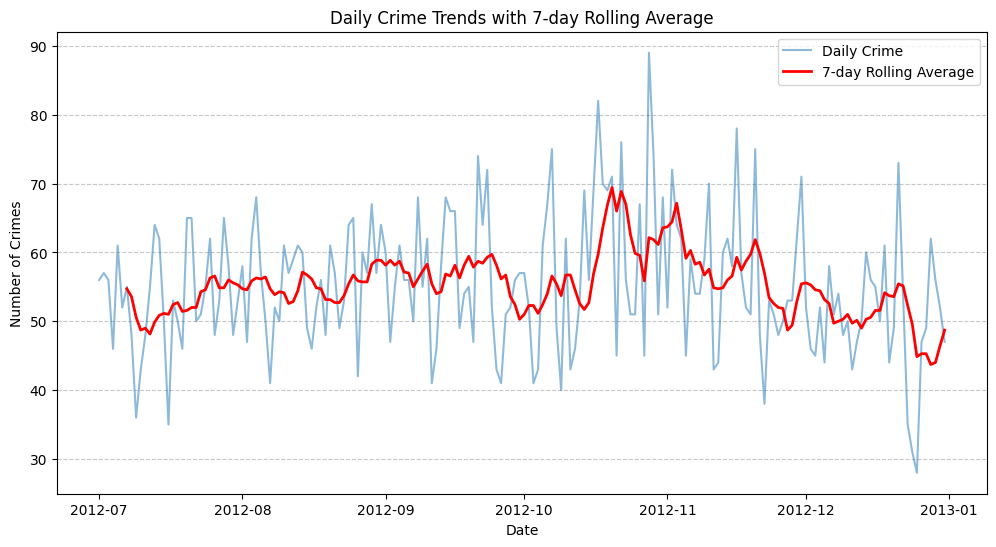

In [ ]:
# Compute rolling average (7-day window)
rolling_avg = daily_trend.rolling(window=7).mean()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(daily_trend, label="Daily Crime", alpha=0.5)
plt.plot(rolling_avg, label="7-day Rolling Average", color='red', linewidth=2)
plt.title("Daily Crime Trends with 7-day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Comparing Crime Trends by Category**

From line charts below:

+ While all categories exhibit fluctuations, Vandalism shows the most significant fluctuation.
+ Drug/Narcotic and Vandalism show the highest peak incidents, particularly around October, while Robbery and Vandalism show comparatively lower and more consistent crime counts.

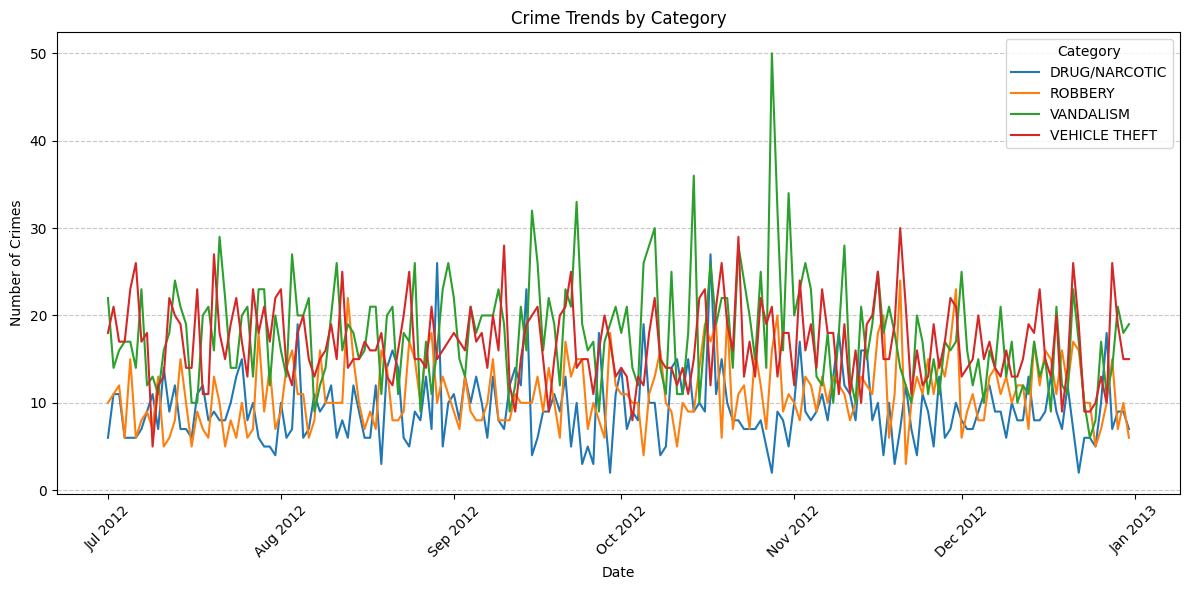

In [ ]:
# Convert 'Date' to datetime if it's not already
combined_gdf['Date'] = pd.to_datetime(combined_gdf['Date'])

# Group by Date and Category, then unstack to get columns for each category
crime_trend_by_category = combined_gdf.groupby(["Date", "Category"]).size().unstack(fill_value=0)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each category as a separate line
plt.plot(crime_trend_by_category.index, crime_trend_by_category['DRUG/NARCOTIC'], label='DRUG/NARCOTIC')
plt.plot(crime_trend_by_category.index, crime_trend_by_category['ROBBERY'], label='ROBBERY')
plt.plot(crime_trend_by_category.index, crime_trend_by_category['VANDALISM'], label='VANDALISM')
plt.plot(crime_trend_by_category.index, crime_trend_by_category['VEHICLE THEFT'], label='VEHICLE THEFT')

# Add labels and title
plt.title("Crime Trends by Category")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")

# Add legend
plt.legend(title="Category")

# Improve date formatting on x-axis
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b %Y"))
plt.xticks(rotation=45)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

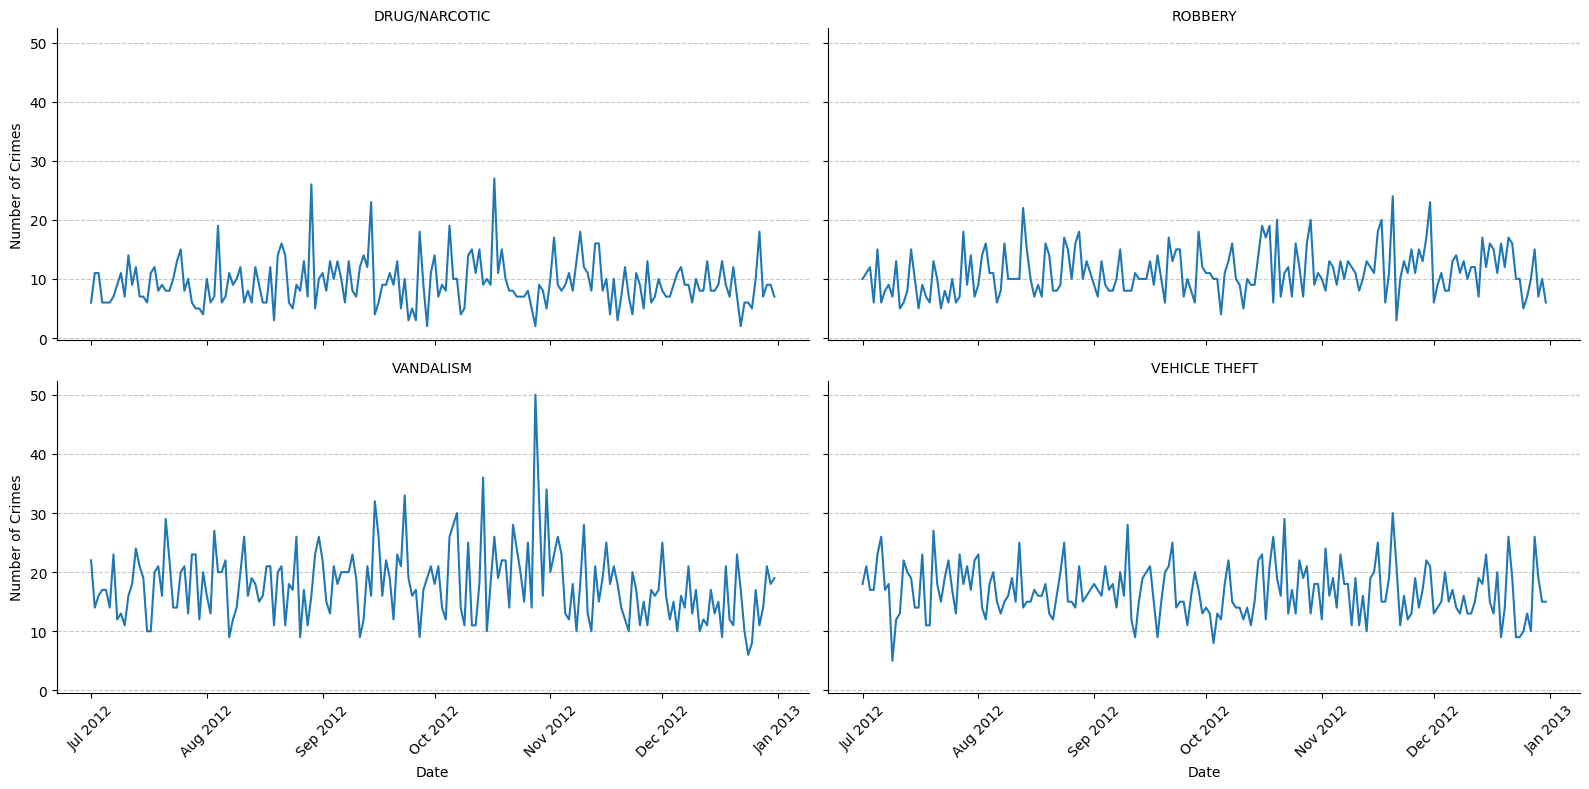

In [ ]:
# Convert 'Date' to datetime if it's not already
combined_gdf['Date'] = pd.to_datetime(combined_gdf['Date'])

# Count the occurrences of each category per date
crime_trend_by_category = combined_gdf.groupby(["Date", "Category"]).size().reset_index(name="Count")

# Create the FacetGrid
g = sns.FacetGrid(crime_trend_by_category, col="Category", col_wrap=2, height=4, aspect=2)

# Map line plots to each subplot
g.map(plt.plot, "Date", "Count")

# Add titles and labels
g.set_axis_labels("Date", "Number of Crimes")
g.set_titles(col_template="{col_name}")

# Improve date formatting on x-axis
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
    ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b %Y"))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**Time Series Forecasting**

Using ARIMA and Facebook Prophet for Daily Forecasting

With only 5 months of data, your ability to capture long-term trends and robust seasonality will be limited. Therefore, focusing on interpreting daily trend.

In [ ]:
#Load and preprocess data
# Keep only relevant columns
df = combined_gdf[['Date', 'IncidntNum']].copy()

# Aggregate number of incidents per day
df = df.groupby('Date').count().reset_index()

# Sort by Date
df = df.sort_values('Date')

# Set Date as index
df = df.set_index('Date')

# Shape of Dataset
print(df.shape)

# Print min and max dates
print("Start Date:", df.index.min())
print("End Date:", df.index.max())

df.head()

(184, 1)
Start Date: 2012-07-01 00:00:00
End Date: 2012-12-31 00:00:00


IncidntNum
Date                  
2012-07-01          56
2012-07-02          57
2012-07-03          56
2012-07-04          46
2012-07-05          61

**Time Series Decompostion**

<Figure size 1200x800 with 0 Axes>

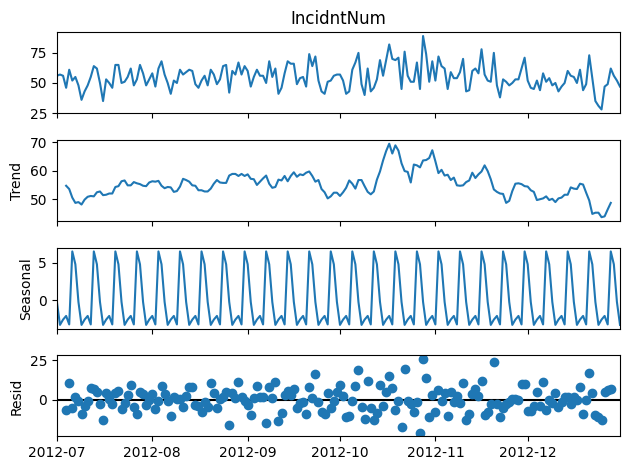

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# Check for seasonality
plt.figure(figsize=(12, 8))
seasonal_result = seasonal_decompose(df['IncidntNum'], model='additive', period=7)  # Weekly seasonality
seasonal_result.plot()
plt.tight_layout()
plt.show()

#### Check to see if our dataset is Stationary by using different kinds of tests
+ Visual Plot Test
+ Summary of Stats
+ AD Fuller Test(null)
    - determine the presence of unit root in the series
    - null hypothesis and alternate hypothesis
    - test stats < critical value is stationary
+ KPSS Test (Kwiatkowski-Phillips-Schmidt-Shin)

**Visual Plot Test**

<Axes: xlabel='Date'>

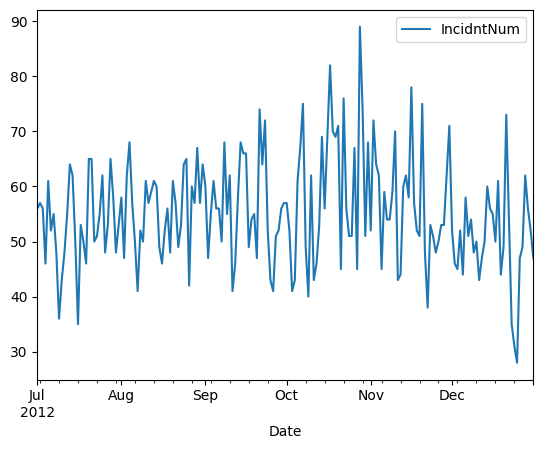

In [ ]:
# Plot Test
df.plot()

<Axes: ylabel='Frequency'>

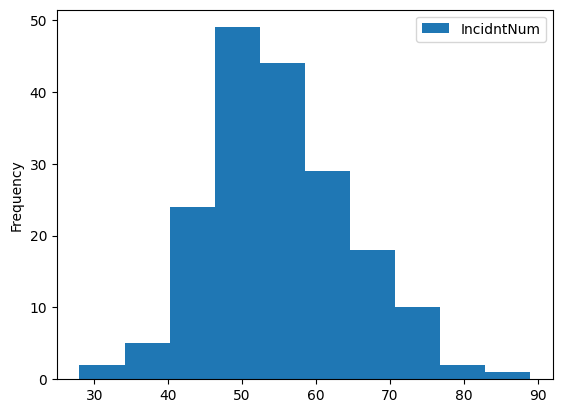

In [ ]:
# Histogram
df.plot(kind="hist")

#### Narrative
+ While the histogram deviates slightly from a perfect Gaussian bell curve, it still exhibits a relatively centered distribution, suggesting potential mean stationarity, which is supported by subsequent statistical tests.

### Summary Stats
+ Split
+ Find mean and variance of each

In [ ]:
print(df.shape)
print(df.columns)

#Create a series
X=df['IncidntNum'].values

# Split our dataset
len(X)/2

(184, 1)
Index(['IncidntNum'], dtype='object')


92.0

In [ ]:
X1, X2 = X[0:92], X[92:]

In [ ]:
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1={}, mean2={}'.format(mean1, mean2))
print('variance1={}, variance2={}'.format(var1, var2))

mean1=54.97826086956522, mean2=55.380434782608695
variance1=62.10822306238186, variance2=127.88787807183365


####Narrative
+ The means of the two halves exhibit close values, and while the variances differ, the overall stability of the mean, as further evidenced by the ADF and KPSS tests, indicates stationarity.

### Augment Dickey Fuller Test

In [ ]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd

def adf_test(timeseries):
    print('Results of Aug. Dickey-Fuller Test:')
    df_test = adfuller(timeseries, autolag='AIC')
    df_output = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in df_test[4].items():
        df_output['Critical Value {}'.format(key)] = value
    print(df_output)

def is_stationary(stats, critical_value):
    if stats < critical_value:
        print("Stationary")
    else:
        print("Not Stationary")

adf_test(df['IncidntNum'])

# Extract the test statistic and critical value from the ADF test results:
result = adfuller(df['IncidntNum'], autolag='AIC')
test_statistic = result[0]
critical_value_1 = result[4]['1%'] #Using 1% critical value for example, you can use any
print(test_statistic,critical_value_1)
is_stationary(test_statistic, critical_value_1)

Results of Aug. Dickey-Fuller Test:
Test Statistic                -1.042171e+01
p-value                        1.697915e-18
#Lags Used                     0.000000e+00
Number of Observations Used    1.830000e+02
Critical Value 1%             -3.466598e+00
Critical Value 5%             -2.877467e+00
Critical Value 10%            -2.575260e+00
dtype: float64
-10.421714527848824 -3.466598080268425
Stationary


####Narrative:

+ The ADF test indicates stationarity, as the test statistic is significantly less than the critical values.

#### KPSS Test
+ Opposite of AD Fuller

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto") # Added nlags="auto"
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value {}'.format(key)] = value
    print(kpss_output)

def is_stationary_kpss(stats, critical_value):
    if stats < critical_value: # Changed > to <
        print("Stationary (Null Hypothesis Accepted)")
    else:
        print("Not Stationary (Null Hypothesis Rejected)")

# Run the KPSS test
kpss_test(df['IncidntNum'])

# Get the test results
kpss_results = kpss(df['IncidntNum'], regression='c', nlags="auto")
test_statistic = kpss_results[0]
critical_value_05 = kpss_results[3]['5%'] # Using 5% critical value

# Check for stationarity
is_stationary_kpss(test_statistic, critical_value_05)

Results of KPSS Test:
Test Statistic         0.286101
p-value                0.100000
Lags Used              3.000000
Critical Value 10%     0.347000
Critical Value 5%      0.463000
Critical Value 2.5%    0.574000
Critical Value 1%      0.739000
dtype: float64
Stationary (Null Hypothesis Accepted)


<ipython-input-45-cc44d72aac11>:6: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.


<ipython-input-45-cc44d72aac11>:22: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




####Narrative:
+ The KPSS test indicates stationarity as the test statistic is less than all critical values

####Splitting into Training and Testing Sets

 Divide data into for training (80%) and for testing sets (20%)

In [ ]:
train_size = int(len(df) * 0.8)
train = df.iloc[:train_size]
test = df.iloc[train_size:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (147, 1)
Test shape: (37, 1)


In [ ]:
train.columns

Index(['IncidntNum'], dtype='object')

###Build model and Make predictions

Based on the time series forecasting analysis of incident data from July to December 2012, three forecasting models were evaluated: **Holt-Winters Exponential Smoothing, ARIMA, and Facebook Prophet**.

Each model underwent rigorous evaluation including:
 1. Model fitting
 2. Test data forecasting
 3. Residual analysis
 4. Confidence interval forecasting
 5. Cross-validation
 6. Performance metric calculation. Performance metrics (RMSE, MAE, R², MAPE) were used to identify the optimal model.
 7. Future Forecasting

 **ARIMA demonstrated superior performance across all metrics** with the lowest RMSE (11.05), MAE (9.20), and MAPE (20.95%), as well as the highest R² value (-0.54). Although all models produced negative R² values indicating some limitations in fit, ARIMA clearly provided the most accurate forecasts for this particular time series dataset, making it the recommended model for future incident number predictions.

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.3 MB/s eta 0:00:00


**Holt-Winters Exponential Smoothing Model**

==== Holt-Winters Exponential Smoothing ====

--- Model Diagnostics ---


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



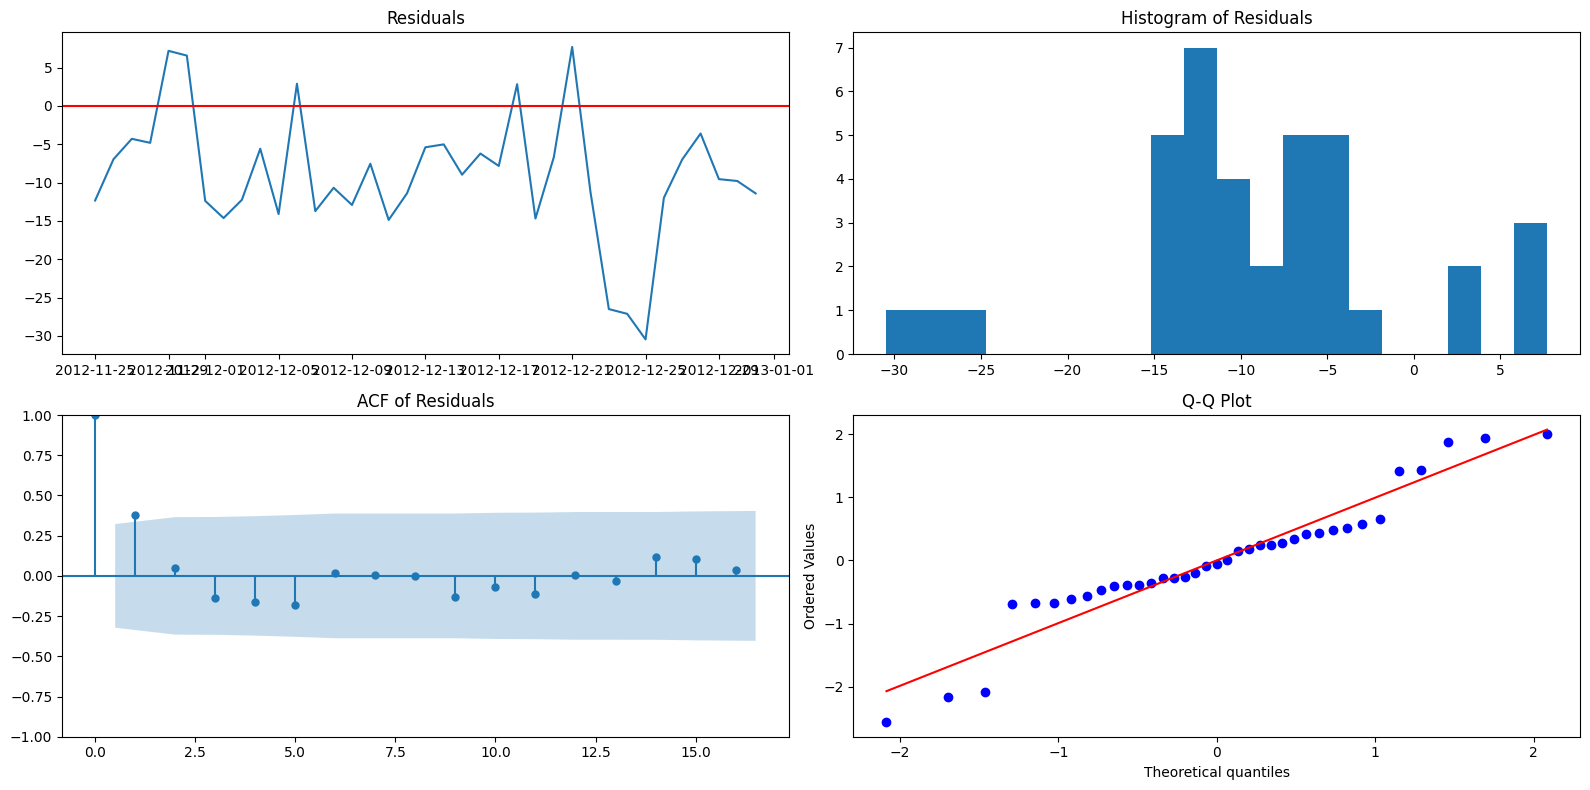


--- Forecast with Confidence Intervals ---


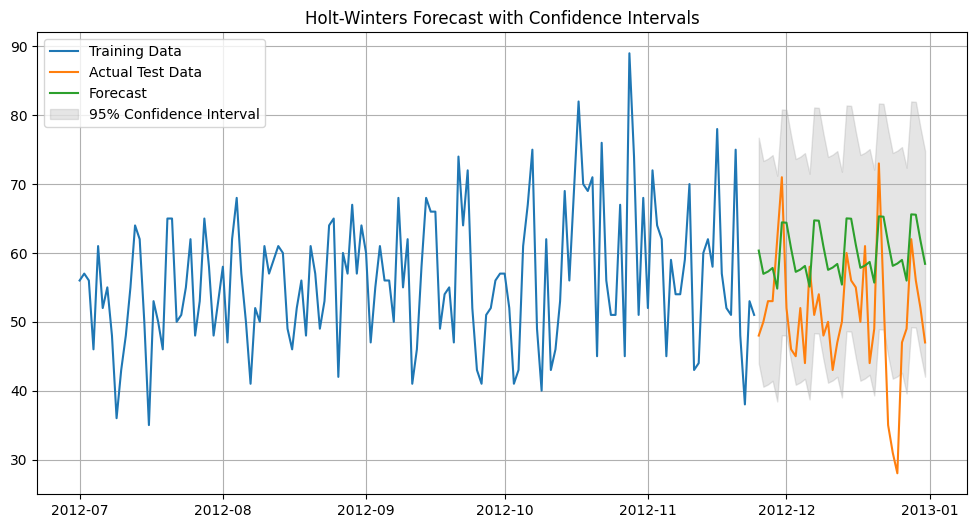


--- Time Series Cross-Validation ---


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



   fold  train_size  test_size       rmse        mae
0     1          30         30   7.206559   5.893157
1     2          60         30   8.100480   6.465681
2     3          90         30  12.858837  10.196291
3     4         120         30  10.526503   8.836997
4     5         150         30  12.352855  10.534462

--- Performance Metrics ---
RMSE: 12.25
MAE: 10.52
R²: -0.8902
MAPE: 23.76%

--- Future Forecast ---


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



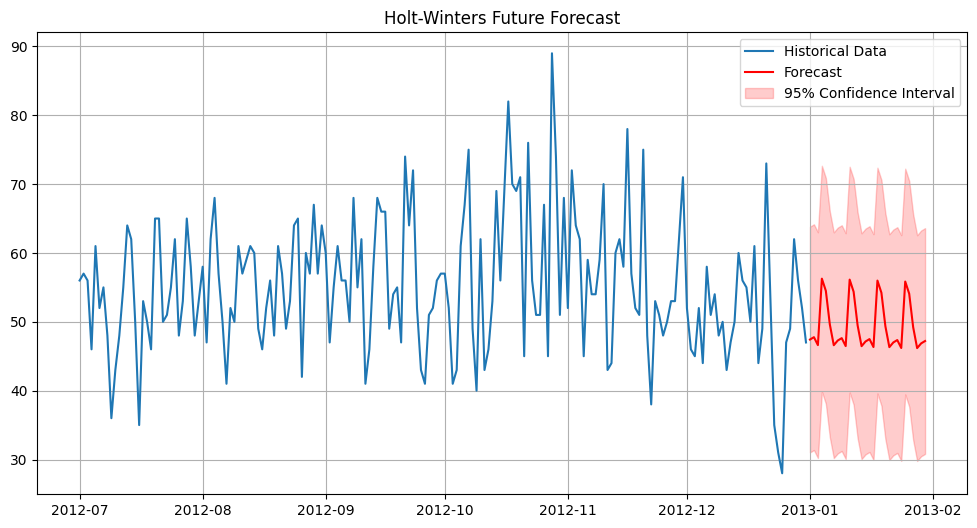

Final Holt-Winters Future Forecast:
             forecast   lower_ci   upper_ci
2013-01-01  47.421685  31.027941  63.815428
2013-01-02  47.767767  31.374024  64.161510
2013-01-03  46.613879  30.220136  63.007623
2013-01-04  56.267967  39.874224  72.661711
2013-01-05  54.499325  38.105582  70.893069
2013-01-06  49.635542  33.241799  66.029286
2013-01-07  46.599764  30.206020  62.993507
2013-01-08  47.281851  30.888107  63.675594
2013-01-09  47.627933  31.234190  64.021676
2013-01-10  46.474045  30.080302  62.867789
2013-01-11  56.128133  39.734390  72.521877
2013-01-12  54.359491  37.965748  70.753234
2013-01-13  49.495708  33.101965  65.889452
2013-01-14  46.459930  30.066186  62.853673
2013-01-15  47.142017  30.748273  63.535760
2013-01-16  47.488099  31.094356  63.881842
2013-01-17  46.334211  29.940468  62.727955
2013-01-18  55.988299  39.594556  72.382043
2013-01-19  54.219657  37.825914  70.613400
2013-01-20  49.355874  32.962131  65.749617
2013-01-21  46.320096  29.926352  62.713

In [ ]:
# Holt-Winters Exponential Smoothing Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df, train, and test are already defined

# 1. Model Fitting
print("==== Holt-Winters Exponential Smoothing ====")
hw_model = ExponentialSmoothing(
    train['IncidntNum'],
    trend='add',
    seasonal='add',
    seasonal_periods=7  # Weekly seasonality
).fit()

# 2. Forecast on test data
hw_forecast = hw_model.forecast(len(test))
hw_pred = pd.DataFrame({'IncidntNum': hw_forecast}, index=test.index)

# 3. Model Diagnostics
print("\n--- Model Diagnostics ---")
# Residuals analysis
residuals = test['IncidntNum'] - hw_forecast
residuals_std = (residuals - residuals.mean()) / residuals.std()

fig, ax = plt.subplots(2, 2, figsize=(16, 8))
# 3.1 Residuals plot
ax[0, 0].plot(residuals)
ax[0, 0].set_title('Residuals')
ax[0, 0].axhline(y=0, color='r', linestyle='-')

# 3.2 Histogram of residuals
ax[0, 1].hist(residuals, bins=20)
ax[0, 1].set_title('Histogram of Residuals')

# 3.3 ACF of residuals
plot_acf(residuals, ax=ax[1, 0])
ax[1, 0].set_title('ACF of Residuals')

# 3.4 Q-Q plot
from scipy import stats
stats.probplot(residuals_std, dist="norm", plot=ax[1, 1])
ax[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

# 4. Confidence Intervals
print("\n--- Forecast with Confidence Intervals ---")
# Holt-Winters doesn't provide built-in conf intervals, so we'll create simple ones based on residual std
resid_std = residuals.std()
hw_pred['lower_ci'] = hw_pred['IncidntNum'] - 1.96 * resid_std
hw_pred['upper_ci'] = hw_pred['IncidntNum'] + 1.96 * resid_std

# Plot forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['IncidntNum'], label='Training Data')
plt.plot(test.index, test['IncidntNum'], label='Actual Test Data')
plt.plot(hw_pred.index, hw_pred['IncidntNum'], label='Forecast')
plt.fill_between(hw_pred.index, hw_pred['lower_ci'], hw_pred['upper_ci'],
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('Holt-Winters Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

# 5. Cross-Validation
print("\n--- Time Series Cross-Validation ---")
# Implement rolling window cross-validation
def ts_cv_holtwinters(data, n_splits=5):
    results = []
    window_size = len(data) // (n_splits + 1)

    for i in range(n_splits):
        # Define train/test indices for this split
        end_train = (i + 1) * window_size
        end_test = (i + 2) * window_size

        # Skip if we run out of data
        if end_test > len(data):
            break

        # Split data
        train_cv = data.iloc[:end_train]
        test_cv = data.iloc[end_train:end_test]

        # Fit model and forecast
        model = ExponentialSmoothing(
            train_cv['IncidntNum'],
            trend='add',
            seasonal='add',
            seasonal_periods=7
        ).fit()

        forecast = model.forecast(len(test_cv))

        # Calculate error metrics
        mse = mean_squared_error(test_cv['IncidntNum'], forecast)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(test_cv['IncidntNum'], forecast)

        results.append({
            'fold': i+1,
            'train_size': len(train_cv),
            'test_size': len(test_cv),
            'rmse': rmse,
            'mae': mae
        })

    return pd.DataFrame(results)

cv_results = ts_cv_holtwinters(df)
print(cv_results)

# 6. Performance Metrics
print("\n--- Performance Metrics ---")
rmse_1 = np.sqrt(mean_squared_error(test['IncidntNum'], hw_forecast))
mae_1 = mean_absolute_error(test['IncidntNum'], hw_forecast)
r2_1 = r2_score(test['IncidntNum'], hw_forecast)
mape_1 = np.mean(np.abs((test['IncidntNum'] - hw_forecast) / test['IncidntNum'])) * 100

print(f"RMSE: {rmse_1:.2f}")
print(f"MAE: {mae_1:.2f}")
print(f"R²: {r2_1:.4f}")
print(f"MAPE: {mape_1:.2f}%")

# 7. Future Forecast
print("\n--- Future Forecast ---")
# Refit model on entire dataset
full_hw_model = ExponentialSmoothing(
    df['IncidntNum'],
    trend='add',
    seasonal='add',
    seasonal_periods=7
).fit()

# Forecast 30 days into the future
future_days = 30
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days)
future_forecast = full_hw_model.forecast(future_days)

# Create confidence intervals
future_pred = pd.DataFrame({'forecast': future_forecast}, index=future_dates)
future_pred['lower_ci'] = future_pred['forecast'] - 1.96 * resid_std
future_pred['upper_ci'] = future_pred['forecast'] + 1.96 * resid_std

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['IncidntNum'], label='Historical Data')
plt.plot(future_pred.index, future_pred['forecast'], 'r-', label='Forecast')
plt.fill_between(future_pred.index, future_pred['lower_ci'], future_pred['upper_ci'],
                 color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('Holt-Winters Future Forecast')
plt.legend()
plt.grid(True)
plt.show()

print("Final Holt-Winters Future Forecast:")
print(future_pred)

**ARIMA Modeling Method**

==== ARIMA Model ====
--- Finding optimal parameters ---


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



ARIMA(0,0,0) AIC: 1088.10


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



ARIMA(0,0,1) AIC: 1085.60
ARIMA(0,0,2) AIC: 1087.58
ARIMA(0,1,0) AIC: 1153.06


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

ARIMA(0,1,1) AIC: 1084.03
ARIMA(0,1,2) AIC: 1082.57
ARIMA(1,0,0) AIC: 1085.67
ARIMA(1,0,1) AIC: 1087.58


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

ARIMA(1,0,2) AIC: 1089.27
ARIMA(1,1,0) AIC: 1130.18


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

ARIMA(1,1,1) AIC: 1082.76


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



ARIMA(1,1,2) AIC: 1084.57


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



ARIMA(2,0,0) AIC: 1087.55


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2,0,1) AIC: 1089.34


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood opt

ARIMA(2,0,2) AIC: 1086.08
ARIMA(2,1,0) AIC: 1119.92


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



ARIMA(2,1,1) AIC: 1084.44


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



ARIMA(2,1,2) AIC: 1086.73
Best ARIMA order: (0, 1, 2)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



Using seasonal ARIMA model with seasonal_order=(1, 0, 1, 7)

--- Model Summary ---
                                     SARIMAX Results                                     
Dep. Variable:                        IncidntNum   No. Observations:                  147
Model:             ARIMA(0, 1, 2)x(1, 0, [1], 7)   Log Likelihood                -535.049
Date:                           Wed, 26 Mar 2025   AIC                           1080.098
Time:                                   08:58:42   BIC                           1095.016
Sample:                               07-01-2012   HQIC                          1086.159
                                    - 11-24-2012                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8361      0.072    -11

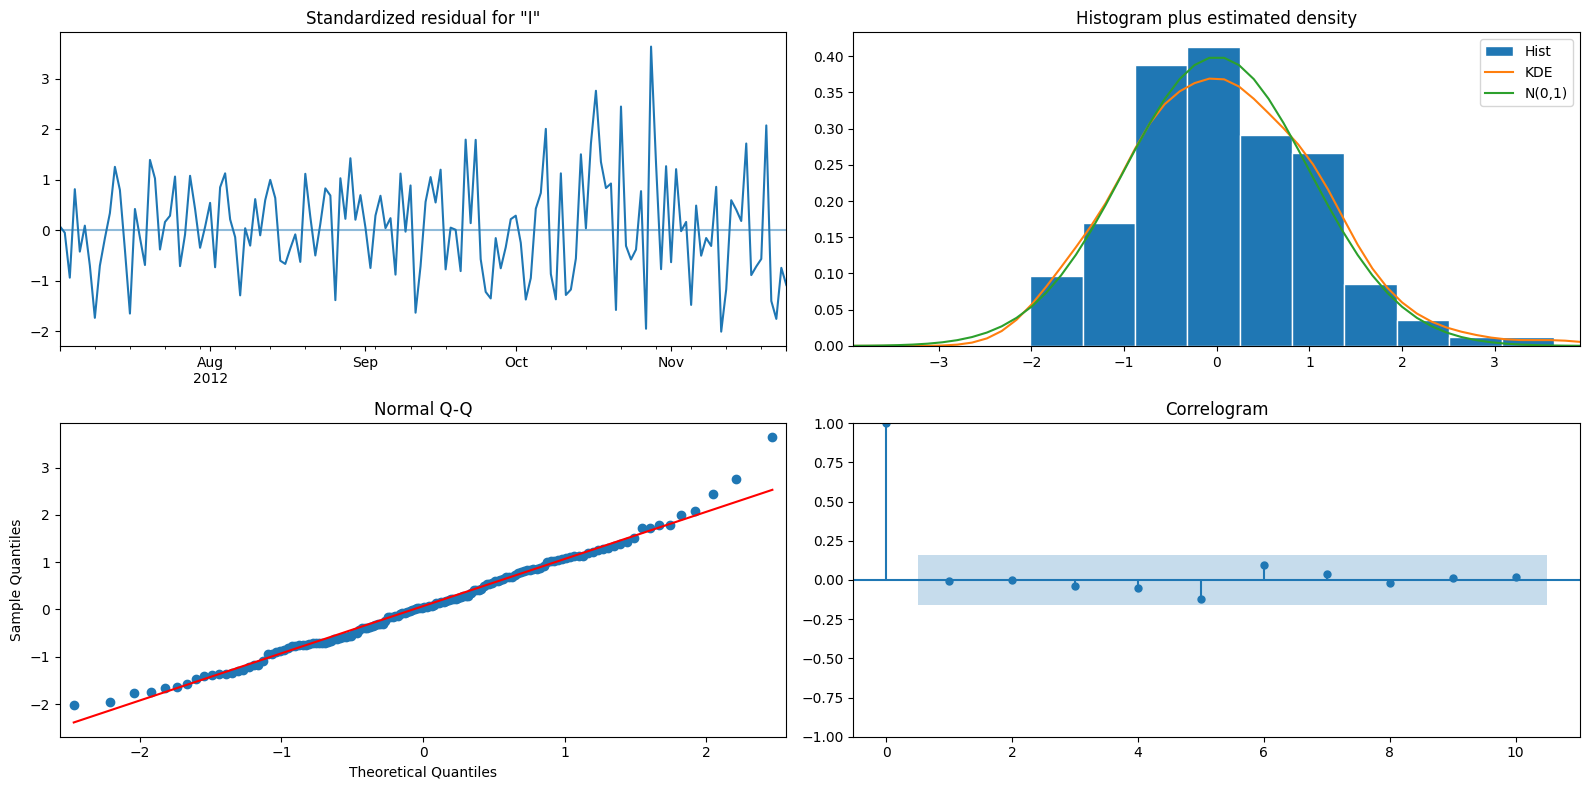


--- Forecast with Confidence Intervals ---


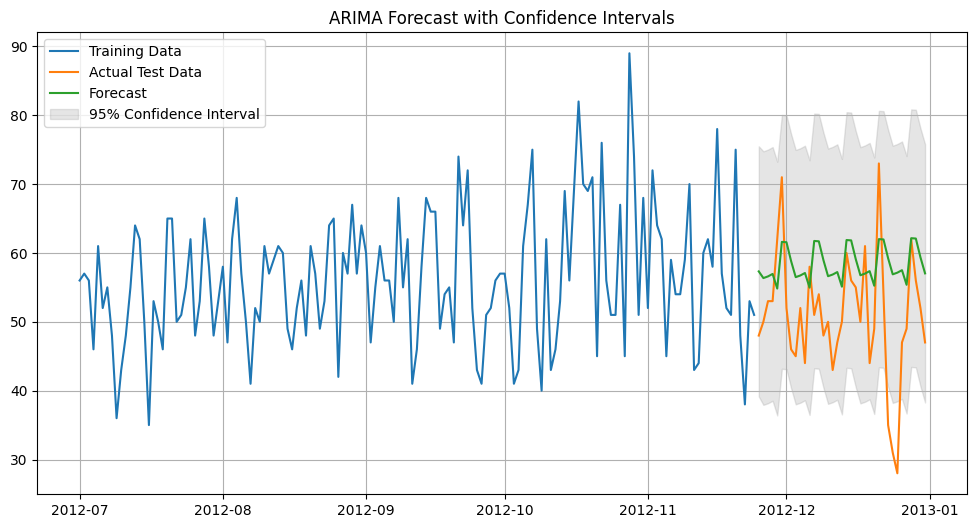


--- Time Series Cross-Validation ---


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so infe

   fold  train_size  test_size       rmse        mae
0     1          30         30   6.839736   5.717314
1     2          60         30   8.672314   6.855401
2     3          90         30  12.948691  10.425229
3     4         120         30  10.294522   8.645658
4     5         150         30  11.395049   9.500398

--- Performance Metrics ---
RMSE: 11.05
MAE: 9.20
R²: -0.5370
MAPE: 20.95%


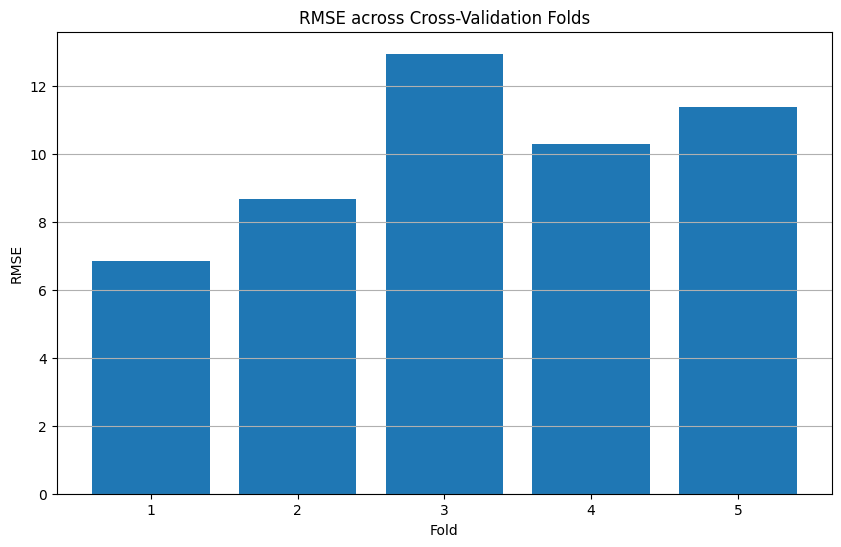


--- Future Forecast ---


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



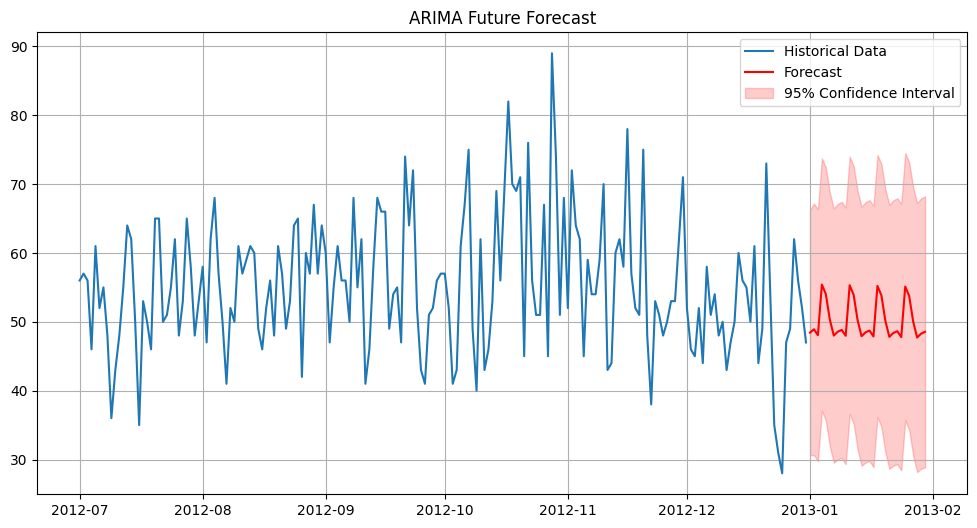

Final ARIMA Future Forecast:
             forecast   lower_ci   upper_ci
2013-01-01  48.425436  30.631955  66.218917
2013-01-02  48.917469  30.652793  67.182145
2013-01-03  48.055913  29.750187  66.361639
2013-01-04  55.410958  37.064274  73.757642
2013-01-05  54.020624  35.632403  72.408845
2013-01-06  50.324905  31.896731  68.753079
2013-01-07  47.996276  29.527447  66.465106
2013-01-08  48.562647  30.010839  67.114455
2013-01-09  48.823662  30.223033  67.424292
2013-01-10  47.962528  29.319222  66.605834
2013-01-11  55.313972  36.628087  73.999857
2013-01-12  53.924319  35.195120  72.653517
2013-01-13  50.230409  31.458643  69.002176
2013-01-14  47.902921  29.088958  66.716883
2013-01-15  48.469014  29.570194  67.367835
2013-01-16  48.729901  29.780635  67.679167
2013-01-17  47.869189  28.875700  66.862677
2013-01-18  55.217033  36.179425  74.254641
2013-01-19  53.828061  34.745451  72.910670
2013-01-20  50.135959  31.008286  69.263633
2013-01-21  47.809610  28.638277  66.980944
201

In [ ]:
# ARIMA Time Series Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import itertools
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming df, train, and test are already defined

# 1. Parameter Selection
print("==== ARIMA Model ====")
print("--- Finding optimal parameters ---")

# Grid search for ARIMA parameters
def find_best_arima_params(train_data, p_values, d_values, q_values):
    best_score, best_cfg = float('inf'), None

    for p, d, q in itertools.product(p_values, d_values, q_values):
        try:
            model = ARIMA(train_data, order=(p, d, q))
            results = model.fit()
            aic = results.aic

            print(f"ARIMA({p},{d},{q}) AIC: {aic:.2f}")

            if aic < best_score:
                best_score = aic
                best_cfg = (p, d, q)
        except:
            continue

    return best_cfg

# Define parameter grid
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

# Find best parameters
best_order = find_best_arima_params(train['IncidntNum'], p_values, d_values, q_values)
print(f"Best ARIMA order: {best_order}")

# 2. Model Fitting
# Try seasonal ARIMA first, fall back to non-seasonal if needed
try:
    seasonal_order = (1, 0, 1, 7)  # Simple seasonal component (P=1, D=0, Q=1, S=7)
    arima_model = ARIMA(
        train['IncidntNum'],
        order=best_order,
        seasonal_order=seasonal_order
    ).fit()
    is_seasonal = True
    print(f"Using seasonal ARIMA model with seasonal_order={seasonal_order}")
except:
    arima_model = ARIMA(
        train['IncidntNum'],
        order=best_order
    ).fit()
    is_seasonal = False
    seasonal_order = None
    print("Using non-seasonal ARIMA model")

# 3. Model Summary
print("\n--- Model Summary ---")
print(arima_model.summary())

# 4. Model Diagnostics
print("\n--- Model Diagnostics ---")
# Use built-in diagnostics plot
arima_model.plot_diagnostics(figsize=(16, 8))
plt.tight_layout()
plt.show()

# 5. Forecasting with Confidence Intervals
print("\n--- Forecast with Confidence Intervals ---")
# Get forecast with confidence intervals
prediction = arima_model.get_forecast(len(test))
prediction_ci = prediction.conf_int()
forecast_values = prediction.predicted_mean

# Create a dataframe with forecasts and intervals
forecast_df = pd.DataFrame({
    'forecast': forecast_values,
    'lower_ci': prediction_ci.iloc[:, 0],
    'upper_ci': prediction_ci.iloc[:, 1]
}, index=test.index)

# Plot forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['IncidntNum'], label='Training Data')
plt.plot(test.index, test['IncidntNum'], label='Actual Test Data')
plt.plot(forecast_df.index, forecast_df['forecast'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df['lower_ci'], forecast_df['upper_ci'],
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('ARIMA Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

# 6. Cross-Validation
print("\n--- Time Series Cross-Validation ---")
# Implement rolling window cross-validation for ARIMA
def ts_cv_arima(data, order, seasonal_order=None, n_splits=5):
    results = []
    window_size = len(data) // (n_splits + 1)

    for i in range(n_splits):
        # Define train/test indices for this split
        end_train = (i + 1) * window_size
        end_test = (i + 2) * window_size

        # Skip if we run out of data
        if end_test > len(data):
            break

        # Split data
        train_cv = data.iloc[:end_train]
        test_cv = data.iloc[end_train:end_test]

        # Fit model and forecast
        try:
            if seasonal_order:
                model = ARIMA(train_cv['IncidntNum'], order=order, seasonal_order=seasonal_order).fit()
            else:
                model = ARIMA(train_cv['IncidntNum'], order=order).fit()

            forecast = model.forecast(len(test_cv))

            # Calculate error metrics
            mse = mean_squared_error(test_cv['IncidntNum'], forecast)
            rmse = np.sqrt(mse)
            mae = mean_absolute_error(test_cv['IncidntNum'], forecast)

            results.append({
                'fold': i+1,
                'train_size': len(train_cv),
                'test_size': len(test_cv),
                'rmse': rmse,
                'mae': mae
            })
        except:
            print(f"Error fitting model for fold {i+1}")

    return pd.DataFrame(results)

if is_seasonal:
    cv_results = ts_cv_arima(df, best_order, seasonal_order)
else:
    cv_results = ts_cv_arima(df, best_order)

print(cv_results)

# 7. Performance Metrics
print("\n--- Performance Metrics ---")
rmse_2 = np.sqrt(mean_squared_error(test['IncidntNum'], forecast_values))
mae_2 = mean_absolute_error(test['IncidntNum'], forecast_values)
r2_2 = r2_score(test['IncidntNum'], forecast_values)
mape_2 = np.mean(np.abs((test['IncidntNum'] - forecast_values) / test['IncidntNum'])) * 100

print(f"RMSE: {rmse_2:.2f}")
print(f"MAE: {mae_2:.2f}")
print(f"R²: {r2_2:.4f}")
print(f"MAPE: {mape_2:.2f}%")

# Visualize cross-validation metrics
plt.figure(figsize=(10, 6))
plt.bar(cv_results['fold'], cv_results['rmse'])
plt.title('RMSE across Cross-Validation Folds')
plt.xlabel('Fold')
plt.ylabel('RMSE')
plt.grid(True, axis='y')
plt.show()

# 8. Future Forecast
print("\n--- Future Forecast ---")
# Refit model on entire dataset
if is_seasonal:
    full_arima_model = ARIMA(
        df['IncidntNum'],
        order=best_order,
        seasonal_order=seasonal_order
    ).fit()
else:
    full_arima_model = ARIMA(
        df['IncidntNum'],
        order=best_order
    ).fit()

# Forecast 30 days into the future
future_days = 30
future_forecast = full_arima_model.get_forecast(steps=future_days)
future_mean = future_forecast.predicted_mean
future_ci = future_forecast.conf_int()

# Create date range for future predictions
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days)

# Create future forecast dataframe
future_df = pd.DataFrame({
    'forecast': future_mean,
    'lower_ci': future_ci.iloc[:, 0],
    'upper_ci': future_ci.iloc[:, 1]
}, index=future_dates)

# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['IncidntNum'], label='Historical Data')
plt.plot(future_df.index, future_df['forecast'], 'r-', label='Forecast')
plt.fill_between(future_df.index, future_df['lower_ci'], future_df['upper_ci'],
                 color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('ARIMA Future Forecast')
plt.legend()
plt.grid(True)
plt.show()

print("Final ARIMA Future Forecast:")
print(future_df)

**Facebook Prophet Time Series Model**

==== Facebook Prophet Model ====
--- Data Preparation ---
Prophet training data shape: (147, 2)
Prophet testing data shape: (37, 2)

--- Model Fitting ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1wuf6tt/agrz7pz7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1wuf6tt/geb_75e9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41370', 'data', 'file=/tmp/tmpp1wuf6tt/agrz7pz7.json', 'init=/tmp/tmpp1wuf6tt/geb_75e9.json', 'output', 'file=/tmp/tmpp1wuf6tt/prophet_model2wka583e/prophet_model-20250326085903.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:59:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:59:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Model fitted successfully

--- Model Components ---


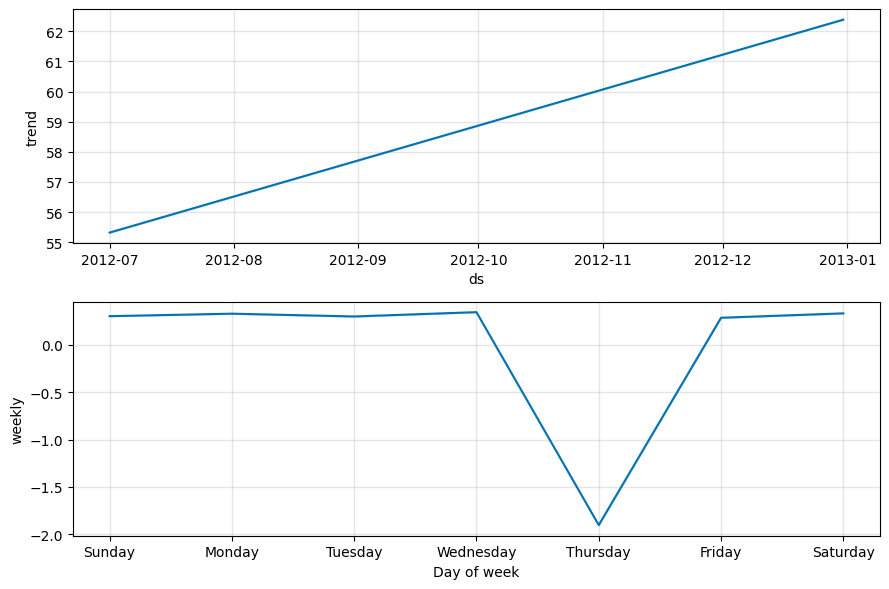


--- Model Diagnostics ---


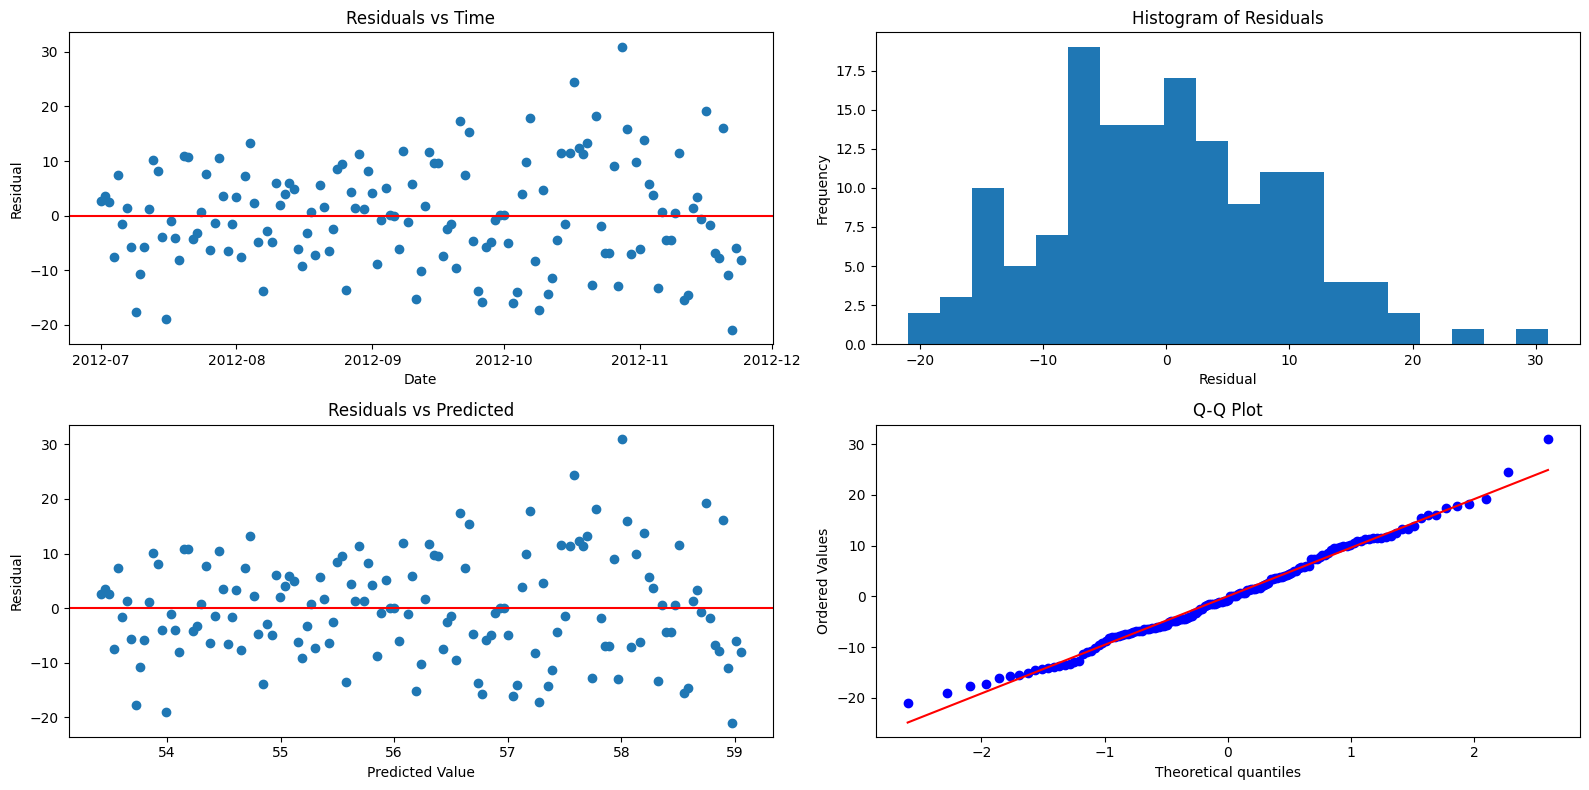


--- Forecast with Confidence Intervals ---


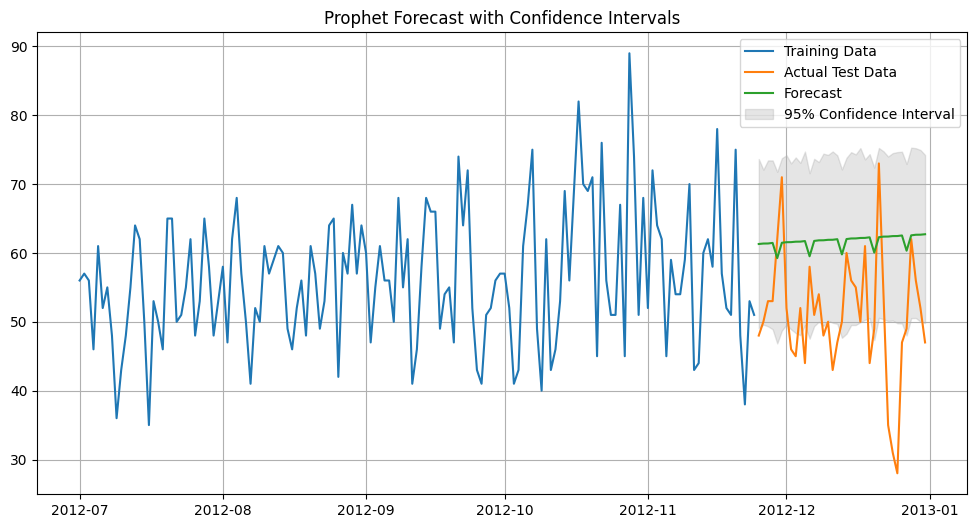

INFO:prophet:Making 4 forecasts with cutoffs between 2012-09-14 00:00:00 and 2012-10-26 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7b1a0202fa90>



--- Time Series Cross-Validation ---


DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1wuf6tt/tk08jswb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1wuf6tt/62nd8urw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1wuf6tt/yg38c8jp.json
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74109', 'data', 'file=/tmp/tmpp1wuf6tt/tk08jswb.json', 'init=/tmp/tmpp1wuf6tt/62nd8urw.json', 'output', 'file=/tmp/tmpp1wuf6tt/prophet_model2mmdu2y4/prophet_model-20250326085908.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:59:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1wuf6tt/0z2q8ubl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10403', 'dat

Cross-validation results:
          ds       yhat  yhat_lower  yhat_upper   y     cutoff
0 2012-09-15  57.433045   48.556628   67.257092  66 2012-09-14
1 2012-09-16  57.503394   48.217791   67.494413  66 2012-09-14
2 2012-09-17  57.573743   48.598725   67.287220  49 2012-09-14
3 2012-09-18  57.644092   48.585594   66.814324  54 2012-09-14
4 2012-09-19  57.714750   48.126893   66.657622  55 2012-09-14

Performance metrics from cross-validation:
  horizon       rmse        mae      mape
0  3 days  12.122167   8.674536  0.130196
1  4 days  11.278195   8.409372  0.126860
2  5 days  11.702414   9.228548  0.154505
3  6 days  12.782793  11.168912  0.199368
4  7 days  13.211757  11.936884  0.200623


/usr/local/lib/python3.11/dist-packages/prophet/plot.py:546: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.

/usr/local/lib/python3.11/dist-packages/prophet/plot.py:547: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.



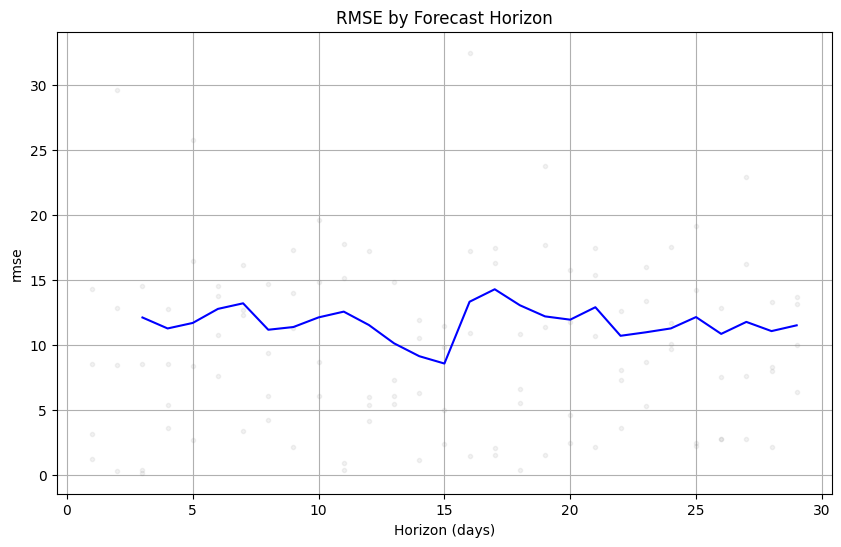

DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1wuf6tt/pj3wg13f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp1wuf6tt/wk03e10c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10987', 'data', 'file=/tmp/tmpp1wuf6tt/pj3wg13f.json', 'init=/tmp/tmpp1wuf6tt/wk03e10c.json', 'output', 'file=/tmp/tmpp1wuf6tt/prophet_modeljcvy4cbx/prophet_model-20250326085911.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:59:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



--- Performance Metrics ---
RMSE: 14.08
MAE: 11.98
R²: -1.4985
MAPE: 27.24%

--- Future Forecast ---


08:59:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


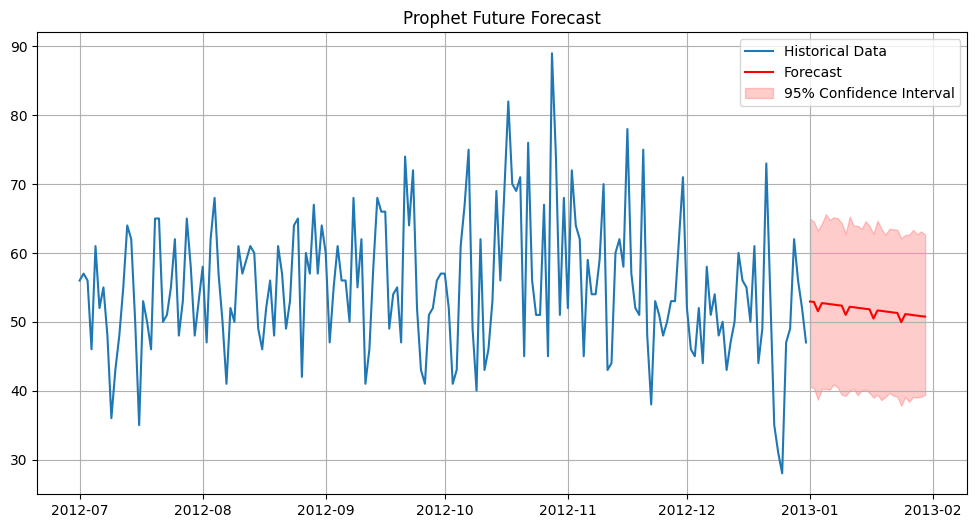

Final Prophet Future Forecast:
          Date   Forecast   Lower_CI   Upper_CI
184 2013-01-01  52.943559  40.592969  64.974561
185 2013-01-02  52.884381  40.358668  64.539862
186 2013-01-03  51.537772  38.689530  63.248428
187 2013-01-04  52.710581  40.242062  64.264291
188 2013-01-05  52.651459  40.241605  65.630701
189 2013-01-06  52.564552  40.144293  64.804361
190 2013-01-07  52.498182  40.914968  65.191435
191 2013-01-08  52.411286  40.452020  65.035659
192 2013-01-09  52.352108  39.396092  64.355213
193 2013-01-10  51.005499  39.240492  62.827953
194 2013-01-11  52.178308  39.993635  65.272781
195 2013-01-12  52.119186  40.285084  63.966169
196 2013-01-13  52.032280  39.326781  63.955117
197 2013-01-14  51.965909  39.998648  63.476742
198 2013-01-15  51.879013  40.222192  64.610707
199 2013-01-16  51.819835  39.666319  63.913386
200 2013-01-17  50.473226  38.992457  62.774637
201 2013-01-18  51.646035  39.412965  64.701724
202 2013-01-19  51.586913  38.627325  63.504444
203 2013-

In [ ]:
# Facebook Prophet Time Series Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming df, train, and test are already defined with train-test split
# df has columns 'Date' and 'IncidntNum'

# 1. Data Preparation for Prophet
print("==== Facebook Prophet Model ====")
print("--- Data Preparation ---")

# Prophet requires specific column names: 'ds' for dates and 'y' for values
def prepare_for_prophet(data):
    # Reset index to get Date as a column if it's the index
    if isinstance(data.index, pd.DatetimeIndex):
        data_prophet = data.reset_index()
        data_prophet.rename(columns={'Date': 'ds', 'IncidntNum': 'y'}, inplace=True)
    else:
        data_prophet = data.copy()
        data_prophet.rename(columns={'Date': 'ds', 'IncidntNum': 'y'}, inplace=True)

    return data_prophet

# Prepare training data
train_prophet = prepare_for_prophet(train)
test_prophet = prepare_for_prophet(test)
full_prophet = prepare_for_prophet(df)

print(f"Prophet training data shape: {train_prophet.shape}")
print(f"Prophet testing data shape: {test_prophet.shape}")

# 2. Model Fitting
print("\n--- Model Fitting ---")
# Initialize and fit the model
model = Prophet(
    yearly_seasonality=False,  # Not enough data for yearly patterns
    weekly_seasonality=True,   # Weekly patterns
    daily_seasonality=False,   # Not usually needed for daily data
    seasonality_mode='additive',
    changepoint_prior_scale=0.05  # Default value, controls flexibility
)

# Add holidays or special events if applicable
# model.add_country_holidays(country_name='US')

# Fit the model
model.fit(train_prophet)
print("Model fitted successfully")

# 3. Model Components and Seasonality
print("\n--- Model Components ---")
# Plot the components (trend, seasonality)
fig = model.plot_components(model.predict(full_prophet))
plt.tight_layout()
plt.show()

# 4. Model Diagnostics
print("\n--- Model Diagnostics ---")
# Make predictions on the training dataset
train_pred = model.predict(train_prophet)

# Calculate residuals
train_prophet['pred'] = train_pred['yhat']
train_prophet['residuals'] = train_prophet['y'] - train_prophet['pred']

# Residual plots
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

# 4.1 Residuals vs Time
ax[0, 0].scatter(train_prophet['ds'], train_prophet['residuals'])
ax[0, 0].axhline(y=0, color='r', linestyle='-')
ax[0, 0].set_title('Residuals vs Time')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Residual')

# 4.2 Residuals Histogram
ax[0, 1].hist(train_prophet['residuals'], bins=20)
ax[0, 1].set_title('Histogram of Residuals')
ax[0, 1].set_xlabel('Residual')
ax[0, 1].set_ylabel('Frequency')

# 4.3 Residuals vs Predicted
ax[1, 0].scatter(train_prophet['pred'], train_prophet['residuals'])
ax[1, 0].axhline(y=0, color='r', linestyle='-')
ax[1, 0].set_title('Residuals vs Predicted')
ax[1, 0].set_xlabel('Predicted Value')
ax[1, 0].set_ylabel('Residual')

# 4.4 Q-Q Plot
from scipy import stats
stats.probplot(train_prophet['residuals'], dist="norm", plot=ax[1, 1])
ax[1, 1].set_title('Q-Q Plot')

plt.tight_layout()
plt.show()

# 5. Forecasting with Confidence Intervals
print("\n--- Forecast with Confidence Intervals ---")
# Create a dataframe for forecasting the test period
future = model.make_future_dataframe(periods=len(test), freq='D')
forecast = model.predict(future)

# Extract the forecast for the test period
forecast_test = forecast.iloc[-len(test):]

# Plot forecast against actual test data
fig = plt.figure(figsize=(12, 6))
plt.plot(train_prophet['ds'], train_prophet['y'], label='Training Data')
plt.plot(test_prophet['ds'], test_prophet['y'], label='Actual Test Data')
plt.plot(forecast_test['ds'], forecast_test['yhat'], label='Forecast')
plt.fill_between(forecast_test['ds'],
                 forecast_test['yhat_lower'],
                 forecast_test['yhat_upper'],
                 color='gray', alpha=0.2, label='95% Confidence Interval')
plt.title('Prophet Forecast with Confidence Intervals')
plt.legend()
plt.grid(True)
plt.show()

# 6. Cross-Validation
print("\n--- Time Series Cross-Validation ---")
# Perform cross-validation
initial = int(len(train_prophet) * 0.5)  # Use 50% of training data as initial training period
period = int(len(train_prophet) * 0.1)   # 10% of training data as period
horizon = int(len(train_prophet) * 0.2)  # 20% of training data as horizon

try:
    cv_results = cross_validation(
        model,
        initial=f"{initial} days",
        period=f"{period} days",
        horizon=f"{horizon} days",
        parallel="processes"
    )

    print("Cross-validation results:")
    print(cv_results.head())

    # Calculate performance metrics
    cv_metrics = performance_metrics(cv_results)
    print("\nPerformance metrics from cross-validation:")
    print(cv_metrics[['horizon', 'rmse', 'mae', 'mape']].head())

    # Plot cross-validation metrics
    fig = plot_cross_validation_metric(cv_results, metric='rmse')
    plt.title('RMSE by Forecast Horizon')
    plt.show()
except Exception as e:
    print(f"Cross-validation failed: {e}")
    print("This might be due to insufficient data for the specified parameters.")
    print("Proceeding without cross-validation.")

# 7. Performance Metrics
print("\n--- Performance Metrics ---")
# Calculate error metrics on test data
y_true = test_prophet['y'].values
y_pred = forecast_test['yhat'].values

rmse_3 = np.sqrt(mean_squared_error(y_true, y_pred))
mae_3 = mean_absolute_error(y_true, y_pred)
r2_3 = r2_score(y_true, y_pred)
mape_3 = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print(f"RMSE: {rmse_3:.2f}")
print(f"MAE: {mae_3:.2f}")
print(f"R²: {r2_3:.4f}")
print(f"MAPE: {mape_3:.2f}%")

# 8. Future Forecast
print("\n--- Future Forecast ---")
# Refit model on entire dataset
full_model = Prophet(
    yearly_seasonality=False,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode='additive',
    changepoint_prior_scale=0.05
)
full_model.fit(full_prophet)

# Create future dataframe for 30 days ahead
future_days = 30
future_df = full_model.make_future_dataframe(periods=future_days, freq='D')
future_forecast = full_model.predict(future_df)

# Extract only the future period (not including historical data)
future_only = future_forecast.iloc[-future_days:]

# Plot the forecast
fig = plt.figure(figsize=(12, 6))
plt.plot(full_prophet['ds'], full_prophet['y'], label='Historical Data')
plt.plot(future_only['ds'], future_only['yhat'], 'r-', label='Forecast')
plt.fill_between(future_only['ds'],
                 future_only['yhat_lower'],
                 future_only['yhat_upper'],
                 color='red', alpha=0.2, label='95% Confidence Interval')
plt.title('Prophet Future Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Display future forecast
future_result = future_only[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
future_result.columns = ['Date', 'Forecast', 'Lower_CI', 'Upper_CI']
print("Final Prophet Future Forecast:")
print(future_result)

**Model Comparison and Best Model Selection**

In [ ]:
# Create a dictionary with all metrics
metrics_data = {
    'Metrics': ['RMSE', 'MAE', 'R²', 'MAPE (%)'],
    'Exponential Smoothing': [rmse_1, mae_1, r2_1, mape_1],
    'ARIMA': [rmse_2, mae_2, r2_2, mape_2],
    'Prophet': [rmse_3, mae_3, r2_3, mape_3]
}

# Create a DataFrame for easy comparison
comparison_df = pd.DataFrame(metrics_data)
comparison_df = comparison_df.set_index('Metrics')

# Display the comparison table
print(comparison_df)

          Exponential Smoothing      ARIMA    Prophet
Metrics                                              
RMSE                  12.249015  11.045401  14.082740
MAE                   10.520989   9.204552  11.978014
R²                    -0.890184  -0.536968  -1.498481
MAPE (%)              23.757366  20.953983  27.236855


**Spatial Analysis & Mapping**

**Heatmap of Crime Locations**

Interactive heatmap of crime locations using Folium allows detailed exploration of crime density across the city.
+ The heatmap highlighted the Southern district as a significant hotspot, demonstrating a high concentration of crime incidents.


In [ ]:
import folium
from folium.plugins import HeatMap

# Create base map centered on a general location
crime_map = folium.Map(location=[combined_gdf['Y'].mean(), combined_gdf['X'].mean()], zoom_start=12)

# Extract coordinates
heat_data = list(zip(combined_gdf['Y'], combined_gdf['X']))

# Add heatmap layer
HeatMap(heat_data, radius=10, blur=5).add_to(crime_map)

# Show the map
crime_map

The heatmap reveals a concentrated crime hotspot around coordinates (-122.42, 37.78), indicating a significantly higher density of crime incidents in that area compared to the rest of the map.

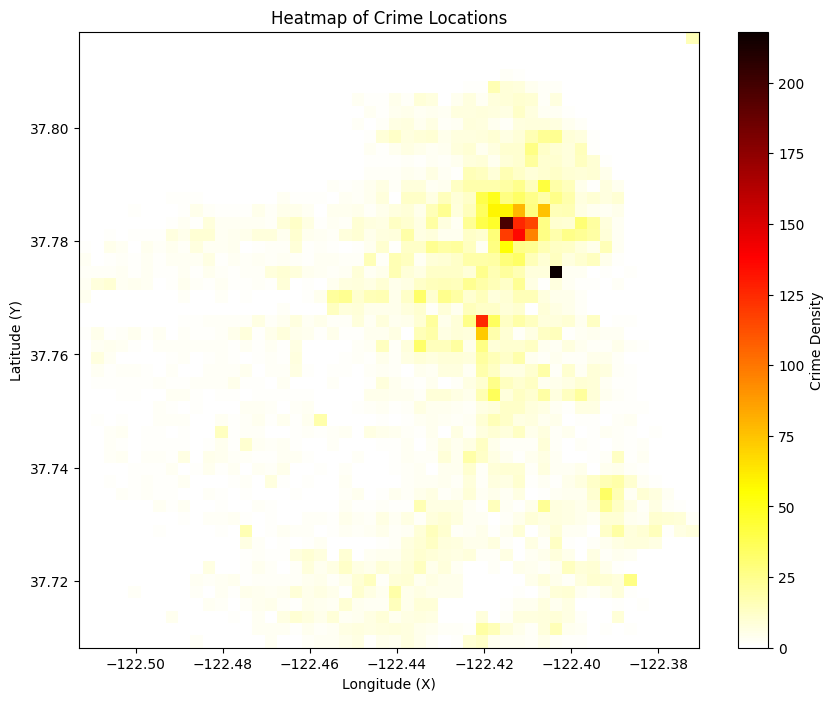

In [ ]:
plt.figure(figsize=(10, 8))

# Create a 2D histogram (heatmap)
plt.hist2d(combined_gdf['X'], combined_gdf['Y'], bins=(50, 50), cmap='hot_r')  # 'hot_r' for reversed hot colormap

# Add colorbar for reference
plt.colorbar(label='Crime Density')

# Add labels and title
plt.title('Heatmap of Crime Locations')
plt.xlabel('Longitude (X)')
plt.ylabel('Latitude (Y)')

# Show the plot
plt.show()

**Animated Crime Map (Folium + Timestamp)**

 Visualizes how crime patterns evolve over time.

In [ ]:
from folium.plugins import HeatMapWithTime

# Prepare data for animation
crime_by_date = [combined_gdf[combined_gdf['Date'] == date][['Y', 'X']].dropna().values.tolist() for date in combined_gdf['Date'].unique()]

# Create base map
crime_map = folium.Map(location=[combined_gdf['Y'].mean(), combined_gdf['X'].mean()], zoom_start=12)

# Add animated heatmap
HeatMapWithTime(crime_by_date, radius=10, auto_play=True, max_opacity=0.8).add_to(crime_map)

# Show map
crime_map


**Bar chart of crime counts per police district.**

+ Crime incident counts vary significantly across the city's police districts, with Southern reporting the highest (2006 cases), followed by Mission and Ingleside, while Richmond reports the lowest.

<ipython-input-56-0b300dc67c86>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




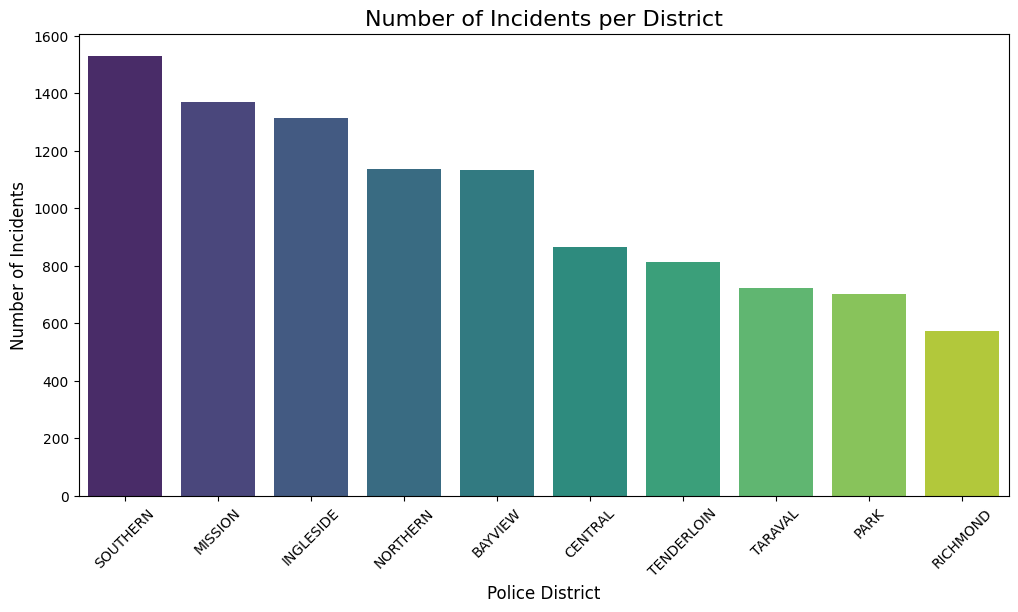

PdDistrict
SOUTHERN      1530
MISSION       1369
INGLESIDE     1312
NORTHERN      1137
BAYVIEW       1131
CENTRAL        865
TENDERLOIN     812
TARAVAL        724
PARK           700
RICHMOND       573
Name: count, dtype: int64


In [ ]:
# Count the number of incidents per district
incidents_per_district = combined_gdf['PdDistrict'].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=incidents_per_district.index, y=incidents_per_district.values, palette="viridis")

# Add titles and labels
plt.title("Number of Incidents per District", fontsize=16)
plt.xlabel("Police District", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Print the incident count per district
print(incidents_per_district)


**Choropleth Map of Crime Incidents by Police Distric for better visual representation**

Try to merge districts geodataframe with combined_gdf based on common column (district and PdDistrict) to have extra informtion about districts in order to displays visually the number of incidents per district on map

Saving Current Police Districts_20250319.zip to Current Police Districts_20250319.zip
Extracted Current Police Districts_20250319.zip
  company    district    shape_area     shape_le_1     shape_leng  \
0       B    SOUTHERN  9.134414e+07  100231.353916   87550.275142   
1       C     BAYVIEW  2.013846e+08  144143.480351  163013.798332   
2       D     MISSION  8.062384e+07   40518.834235   40152.783389   
3       E    NORTHERN  8.278169e+07   50608.310321   56493.858208   
4       J  TENDERLOIN  1.107215e+07   18796.784185   12424.268969   

                                            geometry  
0  MULTIPOLYGON (((-122.39186 37.79425, -122.3917...  
1  POLYGON ((-122.38098 37.7648, -122.38103 37.76...  
2  POLYGON ((-122.40954 37.76932, -122.40862 37.7...  
3  POLYGON ((-122.43379 37.80793, -122.43375 37.8...  
4  POLYGON ((-122.40217 37.78626, -122.41718 37.7...  
  company    district    shape_area     shape_le_1     shape_leng  \
0       B    SOUTHERN  9.134414e+07  100231.353916  

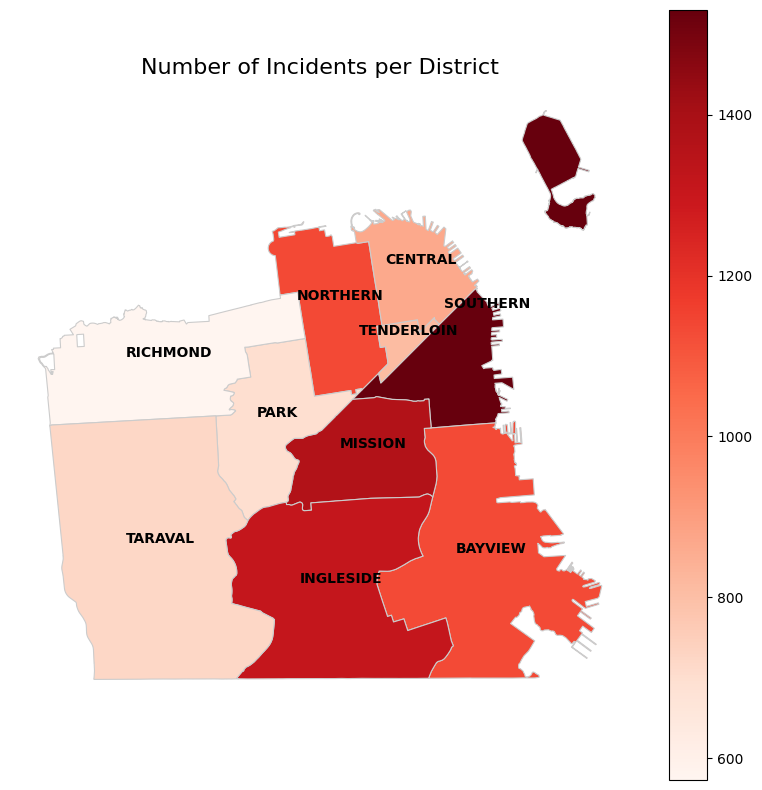

In [ ]:
# Upload the zip file
uploaded = files.upload()  # This will prompt you to upload your zip file

# Extract the uploaded zip file
for filename in uploaded.keys():
    zipfile.ZipFile(filename).extractall('.')
    print(f'Extracted {filename}')

# Load the shapefile (adjust path to your downloaded file)
sf_districts = gpd.read_file("geo_export_5a9b6624-f98d-4c6e-837f-7df170b813a9.shp")

# Check the data
print(sf_districts.head())

# Merge the GeoDataFrame (districts) with the incident data (combined_gdf)

gdf = sf_districts.merge(
    combined_gdf.groupby('PdDistrict').size().reset_index(name='Incidents'),
    how='left',
    left_on='district',
    right_on='PdDistrict'
)

# Check the merged data
print(gdf.head())

# Plotting the number of incidents per district as a choropleth map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot with the 'Incidents' column
gdf.plot(column='Incidents', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Annotate district names
for idx, row in gdf.iterrows():
    # Get the centroid of the district geometry
    centroid = row['geometry'].centroid
    # Add the district name at the centroid's coordinates
    ax.annotate(
        row['district'],  # The district name
        xy=(centroid.x, centroid.y),  # Coordinates of the centroid
        xytext=(5, 5),  # Offset the text slightly to avoid overlap with the polygon
        textcoords='offset points',
        color='black',
        fontsize=10,
        ha='center',  # Horizontal alignment to center the text
        fontweight='bold'
    )

# Title and axis labels
plt.title("Number of Incidents per District", fontsize=16)
plt.axis('off')  # Turn off the axis for better visualization

# Show the map
plt.show()


**Crime Incidents by Police District in San Francisco (Natural Breaks and Fisher-Jenks classification methods)**

Building upon the previous choropleth visualization, we further refined our analysis by applying specific classification techniques to enhance the representation of crime distribution. To ensure the robustness of our findings, both Natural Breaks and Fisher-Jenks methods were employed. To maintain visual consistency with the previous choropleth map, the same 'Reds' color scheme was used for the classification plots.

**Result:**

+  Notably, both Natural Breaks and Fisher-Jenks classification methods yielded identical results, reinforcing the spatial patterns observed in the initial choropleth map. The map clearly highlights the Southern district as having the highest concentration of crime incidents, as indicated by the darkest shade. Other districts, such as Mission and Ingleside, also exhibit relatively high crime rates compared to areas like Richmond and Taraval, which show significantly lower incident counts. The consistency in results between the classification methods underscores the robustness of the observed spatial crime patterns, confirming the findings from the previous choropleth representation.


**NATURE_BREAKS Classification**

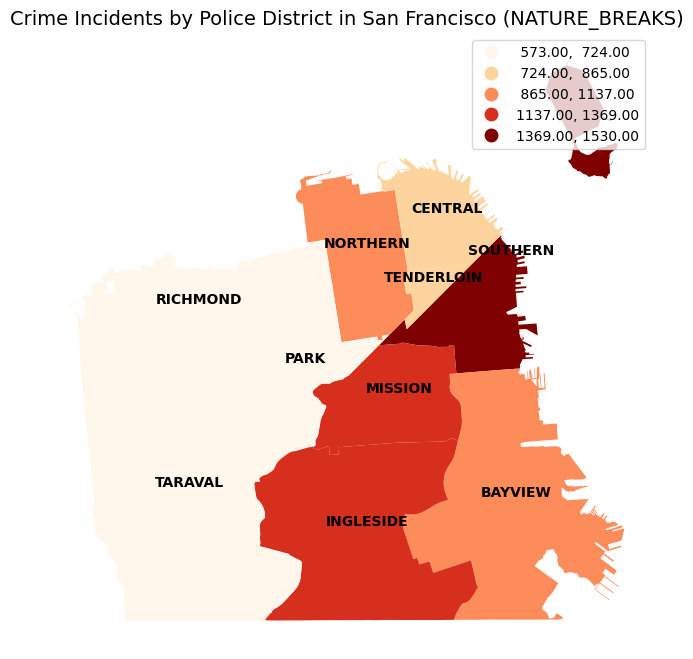

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the district shapefile (adjust the path to your file)
districts_gdf = gpd.read_file("geo_export_5a9b6624-f98d-4c6e-837f-7df170b813a9.shp")

# Aggregate crime counts by district
crime_counts = combined_gdf.groupby("PdDistrict").size().reset_index(name="CrimeCount")

# Merge the district shapefile with crime data
# Make sure the 'PdDistrict' in the crime_counts corresponds to the correct column in your shapefile
sf_map = districts_gdf.merge(crime_counts, left_on="district", right_on="PdDistrict", how="left")

# Plot using Natural Breaks classification
fig, ax = plt.subplots(1, figsize=(12, 8))
sf_map.plot(column="CrimeCount", scheme="NATURAL_BREAKS", cmap="OrRd",
             legend=True, linewidth=0.5, ax=ax)

# Annotate the district names
for idx, row in sf_map.iterrows():
    # Get the centroid of the district geometry
    centroid = row['geometry'].centroid
    # Add the district name at the centroid's coordinates
    ax.annotate(
        row['district'],  # The district name (replace 'district' with the correct column name)
        xy=(centroid.x, centroid.y),  # Coordinates of the centroid
        xytext=(5, 5),  # Offset the text slightly to avoid overlap with the polygon
        textcoords='offset points',
        color='black',
        fontsize=10,
        ha='center',  # Horizontal alignment to center the text
        fontweight='bold'
    )

# Add title and hide the axis
ax.set_title("Crime Incidents by Police District in San Francisco (NATURE_BREAKS)", fontsize=14)
ax.set_axis_off()

# Show the plot
plt.show()


**Fisher-Jenks classification**

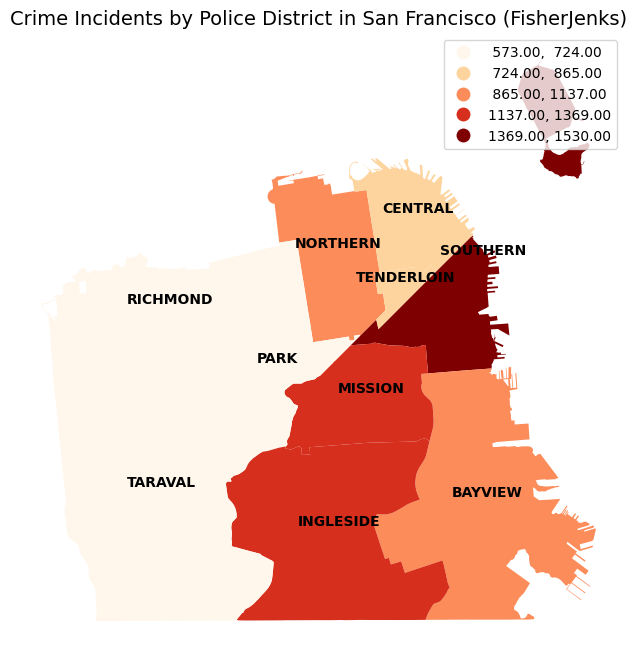

In [ ]:
# Plot using Fisher-Jenks classification
fig, ax = plt.subplots(1, figsize=(12, 8))
sf_map.plot(column="CrimeCount", scheme="FisherJenks", cmap="OrRd",
             legend=True, linewidth=0.5, ax=ax)

# Annotate the district names
for idx, row in sf_map.iterrows():
    # Get the centroid of the district geometry
    centroid = row['geometry'].centroid
    # Add the district name at the centroid's coordinates
    ax.annotate(
        row['district'],  # The district name (replace 'district' with the correct column name)
        xy=(centroid.x, centroid.y),  # Coordinates of the centroid
        xytext=(5, 5),  # Offset the text slightly to avoid overlap with the polygon
        textcoords='offset points',
        color='black',
        fontsize=10,
        ha='center',  # Horizontal alignment to center the text
        fontweight='bold'
    )

# Add title and hide the axis
ax.set_title("Crime Incidents by Police District in San Francisco (FisherJenks)", fontsize=14)
ax.set_axis_off()

# Show the plot
plt.show()

**Spatial Lag Analysis of Crime Incidents in San Francisco**

This part examines how crime incidents in San Francisco are influenced by neighboring districts. Using a Queen contiguity approach, we calculated the spatial lag of crime counts for districts like SOUTHERN, exploring the relationship between crime levels in neighboring areas.

**Result:**
+ The spatial lag of crime counts demonstrates a clear spatial dependence. Districts with higher crime counts tend to be surrounded by areas with similarly high crime rates, suggesting a clustering effect, particularly evident in the Southern district.

<ipython-input-60-f50fffbeda3b>:9: FutureWarning:

`use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning



[1, 2, 3, 4, 5, 6]


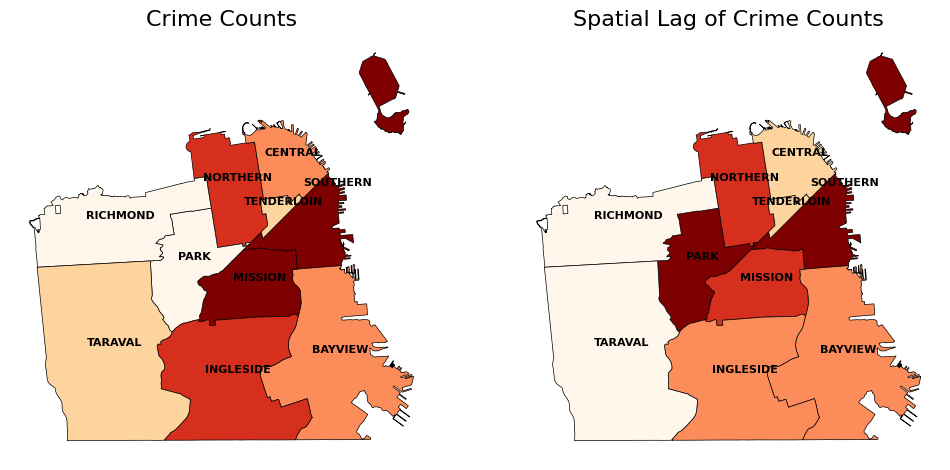

In [ ]:
import libpysal
from libpysal.weights import Queen
import geopandas as gpd
import matplotlib.pyplot as plt
from splot.libpysal import plot_spatial_weights


# Create a spatial weight matrix (Queen contiguity, meaning districts that share boundaries are neighbors)
qW = Queen.from_dataframe(sf_map)

# Check the neighbors of a specific district, for example, the 'SOUTHERN' district
southern_neighbors = qW.neighbors[sf_map[sf_map['PdDistrict'] == 'SOUTHERN'].index[0]]
print(southern_neighbors)

# Calculate spatial lag of crime counts (how crime in a district is influenced by neighboring districts)
crime_counts = sf_map['CrimeCount']
crime_lag = libpysal.weights.lag_spatial(qW, crime_counts)

# Add the spatial lag of crime counts to the dataframe
sf_map['CrimeLag'] = crime_lag

# Plotting: Original crime counts vs spatial lag of crime counts
f, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot original crime counts
sf_map.plot(column='CrimeCount', ax=ax[0], scheme='quantiles', k=5, cmap='OrRd', linewidth=0.5, edgecolor='black')
ax[0].set_title("Crime Counts", fontsize=16)
ax[0].axis('off')

# Annotate district names on the "Crime Counts" map
for idx, row in sf_map.iterrows():
    # Get the centroid of the district geometry
    centroid = row['geometry'].centroid
    # Add the district name at the centroid's coordinates
    ax[0].annotate(
        row['PdDistrict'],  # The district name (replace 'PdDistrict' with the correct column name)
        xy=(centroid.x, centroid.y),  # Coordinates of the centroid
        xytext=(5, 5),  # Offset the text slightly to avoid overlap with the polygon
        textcoords='offset points',
        color='black',
        fontsize=8,
        ha='center',  # Horizontal alignment to center the text
        fontweight='bold'
    )

# Plot spatial lag of crime counts
sf_map.plot(column='CrimeLag', ax=ax[1], scheme='quantiles', k=5, cmap='OrRd', linewidth=0.5, edgecolor='black')
ax[1].set_title("Spatial Lag of Crime Counts", fontsize=16)
ax[1].axis('off')

# Annotate district names on the "Spatial Lag of Crime Counts" map
for idx, row in sf_map.iterrows():
    # Get the centroid of the district geometry
    centroid = row['geometry'].centroid
    # Add the district name at the centroid's coordinates
    ax[1].annotate(
        row['PdDistrict'],  # The district name (replace 'PdDistrict' with the correct column name)
        xy=(centroid.x, centroid.y),  # Coordinates of the centroid
        xytext=(5, 5),  # Offset the text slightly to avoid overlap with the polygon
        textcoords='offset points',
        color='black',
        fontsize=8,
        ha='center',  # Horizontal alignment to center the text
        fontweight='bold'
    )

plt.show()


In [ ]:
sf_map.columns

Index(['company', 'district', 'shape_area', 'shape_le_1', 'shape_leng',
       'geometry', 'PdDistrict', 'CrimeCount', 'CrimeLag'],
      dtype='object')

**Clustering Analysis on Crime Data**
Unsupervised machine learning clustering techniques were applied to analyze crime patterns across different districts. The following methods were used:

1. **K-Means Clustering** – A centroid-based clustering method that partitions the dataset into a pre-defined number of clusters (k = 5).

2. **Hierarchical Clustering** (Agglomerative) – A bottom-up clustering approach that iteratively merges similar data points until reaching a specified number of clusters.

To ensure comparability, the selected crime-related features (CrimeCount and CrimeLag) were normalized using **StandardScaler** before applying the clustering algorithms.

**Results & Evaluation**
+ Silhouette scores were computed to evaluate the cluster quality, with K-Means achieving a score of 0.37 and Hierarchical Clustering achieving 0.46.

**Visualization & Insights**
+ Geospatial maps: While both K-Means and Hierarchical clustering reveal areas of high crime concentration, particularly in the Southern and central districts, the spatial patterns differ. K-Means clustering shows a more distinct cluster in the central area, whereas Hierarchical clustering results in a more gradual transition of crime rates across districts.

+ Violin plots: The K-Means clustering (left) shows relatively compact and distinct crime count distributions across clusters, while the Hierarchical clustering (right) exhibits wider ranges and more pronounced outliers, particularly in cluster 0.

Silhouette Score (K-Means): 0.37389862368828164
Silhouette Score (Hierarchical): 0.4595994175171147


<ipython-input-62-52aa1976b4ed>:43: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.


<ipython-input-62-52aa1976b4ed>:50: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




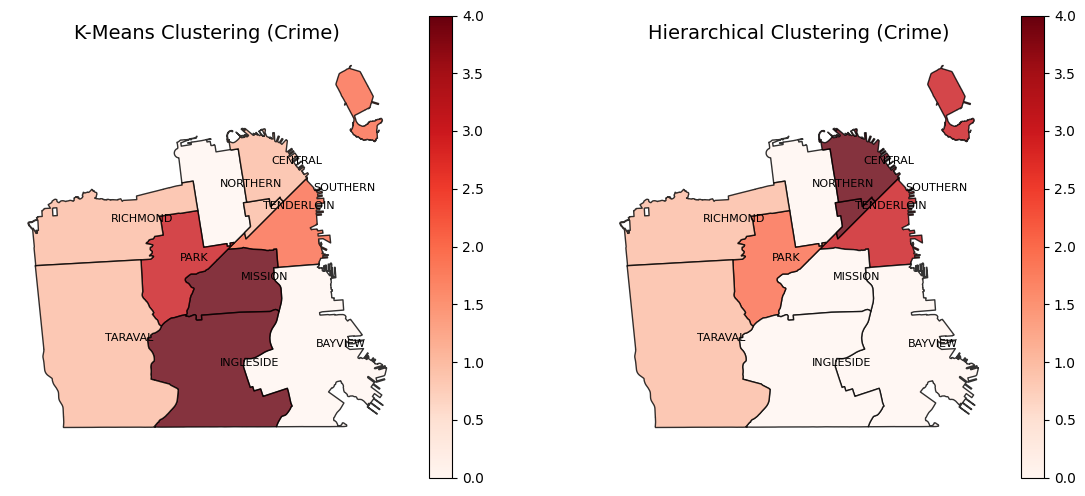

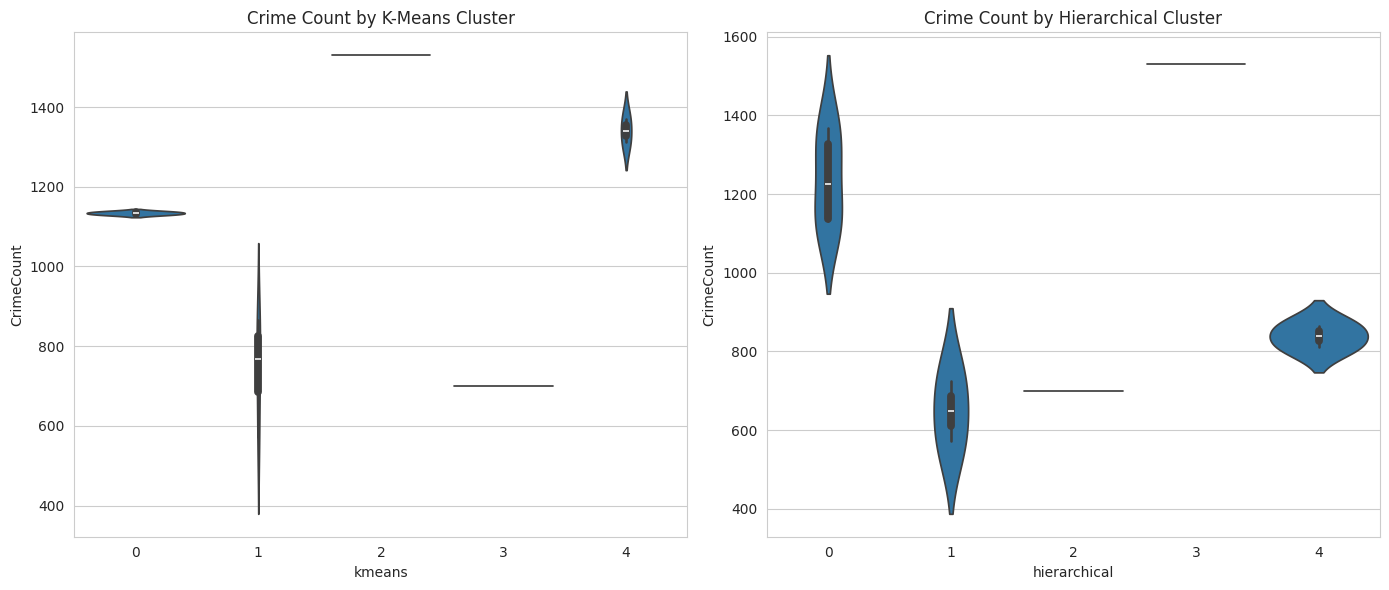

In [ ]:
import geopandas as gpd
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import contextily as cx
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Select features for clustering
columns = ['CrimeCount', 'CrimeLag']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sf_map[columns])

# K-Means Clustering
sf_kmeans = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
sf_map['kmeans'] = sf_kmeans.labels_

# Hierarchical Clustering (Agglomerative)
sf_hierarchical = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
sf_map['hierarchical'] = sf_hierarchical.labels_

# (Optional) Switch to DBSCAN by replacing 'hierarchical' with 'dbscan'
# sf_dbscan = DBSCAN(eps=0.5, min_samples=5).fit(X_scaled)
# sf_map['dbscan'] = sf_dbscan.labels_

# Compute Silhouette Scores
print("Silhouette Score (K-Means):", silhouette_score(X_scaled, sf_kmeans.labels_))

if len(set(sf_hierarchical.labels_)) > 1:
    print("Silhouette Score (Hierarchical):", silhouette_score(X_scaled, sf_hierarchical.labels_))

# Uncomment if using DBSCAN:
# if len(set(sf_dbscan.labels_)) > 1:
#     print("Silhouette Score (DBSCAN):", silhouette_score(X_scaled, sf_dbscan.labels_))
# else:
#     print("DBSCAN resulted in only 1 cluster, silhouette score not computed.")

# Plot Clusters on the Map
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# K-Means Map
sf_map.plot(column='kmeans', ax=ax[0], alpha=0.8, cmap='Reds', edgecolor='black', legend=True)
for x, y, label in zip(sf_map.geometry.centroid.x, sf_map.geometry.centroid.y, sf_map['district']):
    ax[0].annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8, color='black')
ax[0].set_title("K-Means Clustering (Crime)", fontsize=14)
ax[0].axis('off')

# Hierarchical Clustering Map
sf_map.plot(column='hierarchical', ax=ax[1], alpha=0.8, cmap='Reds', edgecolor='black', legend=True)
for x, y, label in zip(sf_map.geometry.centroid.x, sf_map.geometry.centroid.y, sf_map['district']):
    ax[1].annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8, color='black')
ax[1].set_title("Hierarchical Clustering (Crime)", fontsize=14)
ax[1].axis('off')

plt.show()

# Violin Plots to Compare Crime Features in Clusters
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.violinplot(data=sf_map, y='CrimeCount', x=sf_map.kmeans, ax=ax[0])
ax[0].set_title("Crime Count by K-Means Cluster")

sns.violinplot(data=sf_map, y='CrimeCount', x=sf_map.hierarchical, ax=ax[1])
ax[1].set_title("Crime Count by Hierarchical Cluster")

plt.tight_layout()
plt.show()


**Geographic Density of Different Crimes (KDE Plot)**

This plot visualizes the spatial distribution and density of different crime categories across the city, revealing potential hotspots and variations in geographic patterns.

**Results**:

+ While a central hotspot area, located in the northeast region of the city, exhibits high crime density across all categories, each crime type displays a distinct density pattern throughout the city. This variation underscores the significant influence of location (coordinates/Police Districts) on crime distribution, which will be crucial for further analysis and forecasting.
+ Drug/Narcotic and Robbery show a more localized high-density pattern compared to Vandalism and Vehicle Theft, which have slightly broader areas of elevated density. Vehicle Theft exhibits the most dispersed density among the four categories.

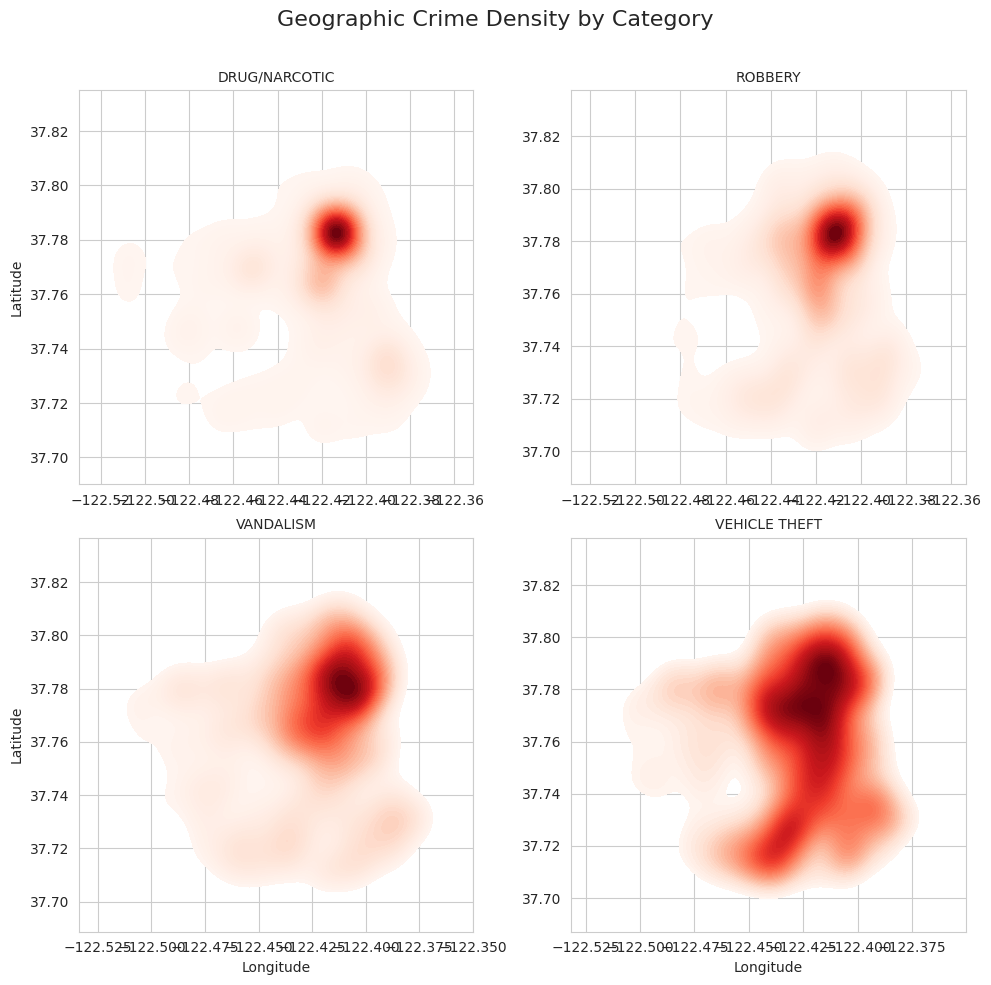

In [ ]:
# Ensure 'Category' column is treated as a categorical variable
combined_gdf["Category"] = combined_gdf["Category"].astype("category")

# Create FacetGrid with a 2x2 layout
g = sns.FacetGrid(combined_gdf, col="Category", col_wrap=2, height=5, sharex=False, sharey=False, despine=False)  # Added despine=False

# Map KDE plot to each facet
g.map_dataframe(sns.kdeplot, x="X", y="Y", cmap="Reds", fill=True, levels=50)

# Set titles for each subplot
g.set_titles(col_template="{col_name}")

# Set axis labels
g.set_axis_labels("Longitude", "Latitude")

# Adjust layout to prevent overlapping
g.fig.suptitle("Geographic Crime Density by Category", fontsize=16)
g.fig.subplots_adjust(top=0.9)  # Adjust top margin

plt.show()

**Block-level**

Following the district-level analysis, which highlighted the Southern district as having the highest crime incidents, a more granular examination at the block level was conducted to identify specific high-crime areas within these districts, enabling targeted interventions and resource allocation.

In [ ]:
# Upload the zip file
uploaded = files.upload()  # This will prompt you to upload your zip file

# Extract the uploaded zip file
for filename in uploaded.keys():
    zipfile.ZipFile(filename).extractall('.')
    print(f'Extracted {filename}')

Saving SF PD Plots.zip to SF PD Plots.zip
Extracted SF PD Plots.zip


In [ ]:
shapefile_path = "SF PD Plots/SFCrime_blocks.shp"
sf_blocks = gpd.read_file(shapefile_path)

# Display the first few rows
print(sf_districts.head())

# Check available columns
print(sf_districts.columns)

  company    district    shape_area     shape_le_1     shape_leng  \
0       B    SOUTHERN  9.134414e+07  100231.353916   87550.275142   
1       C     BAYVIEW  2.013846e+08  144143.480351  163013.798332   
2       D     MISSION  8.062384e+07   40518.834235   40152.783389   
3       E    NORTHERN  8.278169e+07   50608.310321   56493.858208   
4       J  TENDERLOIN  1.107215e+07   18796.784185   12424.268969   

                                            geometry  
0  MULTIPOLYGON (((-122.39186 37.79425, -122.3917...  
1  POLYGON ((-122.38098 37.7648, -122.38103 37.76...  
2  POLYGON ((-122.40954 37.76932, -122.40862 37.7...  
3  POLYGON ((-122.43379 37.80793, -122.43375 37.8...  
4  POLYGON ((-122.40217 37.78626, -122.41718 37.7...  
Index(['company', 'district', 'shape_area', 'shape_le_1', 'shape_leng',
       'geometry'],
      dtype='object')


In [ ]:
num_blocks = len(sf_blocks)
print(f"Total number of blocks: {num_blocks}")

num_unique_blocks = sf_blocks["NAME"].nunique()
print(f"Total unique blocks: {num_unique_blocks}")


Total number of blocks: 579
Total unique blocks: 7


**Crime Incidents by Block**

While the block labels do not provide readily interpretable geographic information, the color gradient clearly indicates areas with higher crime incidents.
+  Vandalism and Robbery show similar patterns with high concentrations in the central-eastern area and a long block on the west for drugs, while Car Theft have more scattered distributions

+ Though Car Theft maintains a significant concentration in the central-eastern area, it has highest density of crime in part in Bayview

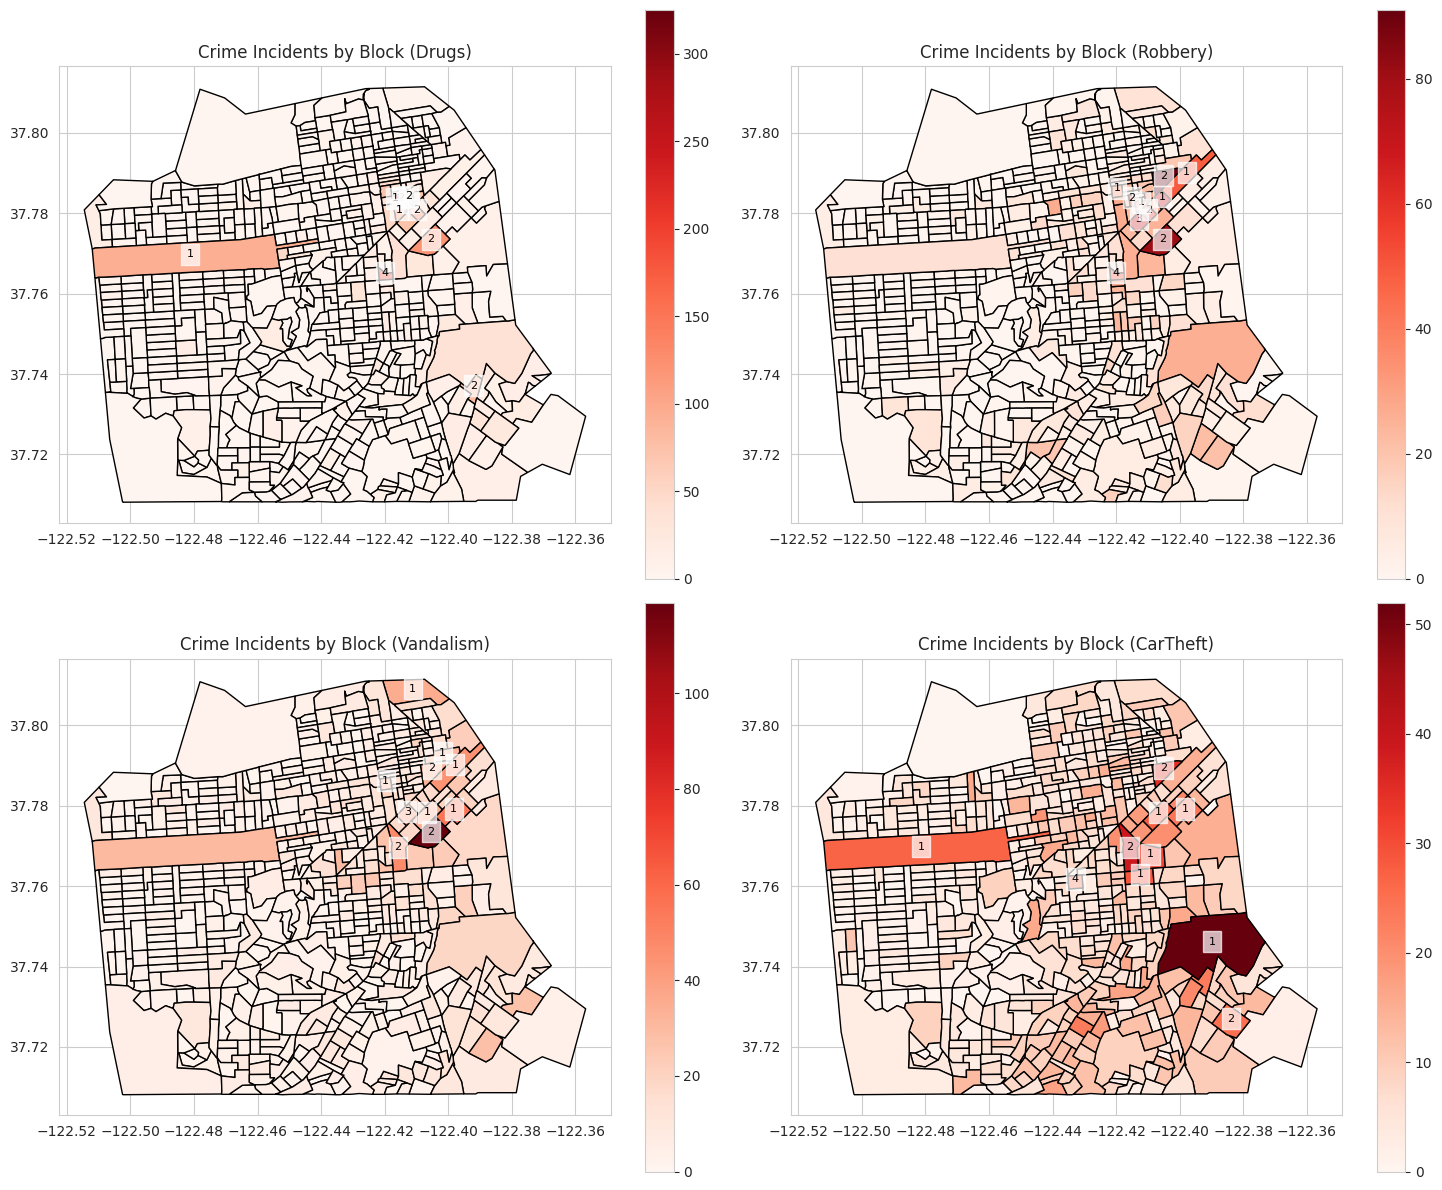

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the SF PD Plots shapefile (already a GeoDataFrame)
sf_blocks = gpd.read_file("SF PD Plots/SFCrime_blocks.shp")

# List of crime types to plot
crime_types = ["Drugs", "Robbery", "Vandalism", "CarTheft"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjust figsize as needed

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through crime types and plot each one
for i, crime_type in enumerate(crime_types):
    ax = axes[i]

    # Plot the map for the current crime type
    sf_blocks.plot(column=crime_type, cmap="Reds", legend=True, edgecolor="black", ax=ax)

    # Identify blocks with high crime for the current type
    top_blocks = sf_blocks.nlargest(10, crime_type)

    # Add labels for top crime blocks
    for idx, row in top_blocks.iterrows():
        centroid = row.geometry.centroid
        ax.text(centroid.x, centroid.y, row["NAME"], fontsize=8, ha="center", color="black", bbox=dict(facecolor="white", alpha=0.7))

    # Title for the subplot
    ax.set_title(f"Crime Incidents by Block ({crime_type})")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

**Crime Rate per Block Group in San Francisco (Per 1,000 Residents)**

+ While most block groups exhibit relatively low crime rates, the dark red area in the central-eastern region suggests a localized hotspot with a substantially higher crime rate per population.

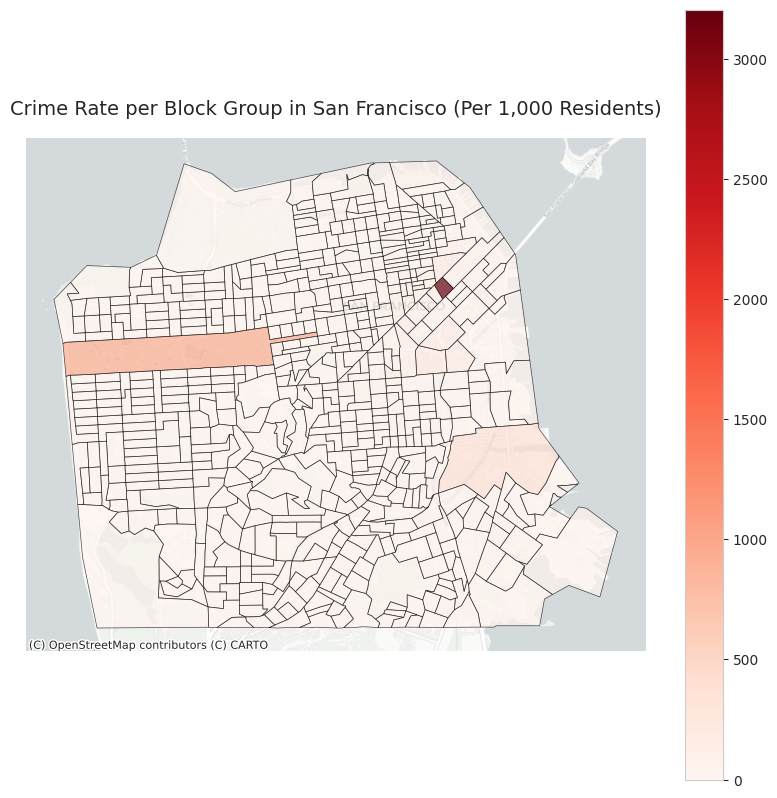

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Load SF Crime Blocks shapefile
sf_blocks = gpd.read_file("SF PD Plots/SFCrime_blocks.shp")

# Calculate total crimes per block group
sf_blocks["TotalCrimes"] = sf_blocks[["Vandalism", "Robbery", "Drugs", "CarTheft"]].sum(axis=1)

# Normalize by population (crimes per 1,000 people)
sf_blocks["CrimesPer1000"] = (sf_blocks["TotalCrimes"] / sf_blocks["Population"]) * 1000

# Convert to Web Mercator for basemap compatibility
sf_blocks = sf_blocks.to_crs(epsg=3857)

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 10))
sf_blocks.plot(
    column="CrimesPer1000",
    cmap="Reds",
    alpha=0.7,
    edgecolor="black",
    linewidth=0.5,
    legend=True,
    ax=ax
)

# Function to add basemap
def add_basemap(ax, zoom=12, source=ctx.providers.CartoDB.Positron):
    ctx.add_basemap(ax, source=source, crs=sf_blocks.crs)

# Add basemap
add_basemap(ax)

# Hide axes and set title
ax.set_axis_off()
plt.title("Crime Rate per Block Group in San Francisco (Per 1,000 Residents)", fontsize=14)
plt.show()


**Predictive Modelling**

Crime Type Prediction: Given a location & time, predict the most likely crime.


In [ ]:
print(combined_gdf.head())
print(combined_gdf.columns)

   IncidntNum       Category                                  Descript  \
0   120517836  DRUG/NARCOTIC                   POSSESSION OF MARIJUANA   
3   120518602  DRUG/NARCOTIC                 SALE OF BASE/ROCK COCAINE   
4   120519490  DRUG/NARCOTIC                     POSSESSION OF COCAINE   
6   120519569  DRUG/NARCOTIC                      POSSESSION OF HEROIN   
9   120519973  DRUG/NARCOTIC  POSSESSION OF BASE/ROCK COCAINE FOR SALE   

  DayOfWeek       Date  PdDistrict      Resolution  \
0    Sunday 2012-07-01     BAYVIEW   ARREST, CITED   
3    Sunday 2012-07-01  TENDERLOIN  ARREST, BOOKED   
4    Monday 2012-07-02     BAYVIEW  ARREST, BOOKED   
6    Monday 2012-07-02  TENDERLOIN  ARREST, BOOKED   
9    Monday 2012-07-02  TENDERLOIN  ARREST, BOOKED   

                      Location           X          Y  \
0         0 Block of EXETER ST -122.398452  37.722882   
3  300 Block of GOLDEN GATE AV -122.416674  37.781540   
4        1200 Block of LANE ST -122.387375  37.734631   
6 

**Data Preparation**

**Feature Engineering**

To prepare the dataset for predictive modeling, several new features were engineered to capture relevant temporal and spatial patterns.

+ Day Extraction: The day of the month was extracted from the 'Date' column,  and the number of days since the first day in the data to provide a more granular temporal resolution beyond the existing 'DayOfWeek' feature.

+ Location Type Extraction: The 'Location' column was analyzed to determine whether each incident occurred at a crossroad or on a block. A new 'Block' column was created, categorizing incidents as 'Block' (True), or 'Other' (False) based on the presence of 'block of' in the location description.

These engineered features, along with the existing 'Month' and 'DayOfWeek' columns, will serve as input variables for the predictive models, aiming to capture both temporal and spatial trends in crime incidents.

In [ ]:
# Create a copy to avoid modifying the original DataFrame
data = combined_gdf.copy()

# Calculate 'n_days'
data['n_days'] = (pd.to_datetime(data['Date']) - pd.to_datetime(data['Date'].min())).dt.days

# Extract the day from the 'Date' column
data['Day'] = pd.to_datetime(data['Date']).dt.day

# Extract 'Block' information (as a boolean)
data['Block'] = data['Location'].str.contains('block', case=False)

# Drop unnecessary columns
columns_to_drop = ['IncidntNum', 'Date', 'Location', 'Descript', 'Resolution', 'geometry']
data.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows of the modified DataFrame
print(data.head())

        Category DayOfWeek  PdDistrict           X          Y Month  n_days  \
0  DRUG/NARCOTIC    Sunday     BAYVIEW -122.398452  37.722882  July       0   
3  DRUG/NARCOTIC    Sunday  TENDERLOIN -122.416674  37.781540  July       0   
4  DRUG/NARCOTIC    Monday     BAYVIEW -122.387375  37.734631  July       1   
6  DRUG/NARCOTIC    Monday  TENDERLOIN -122.415128  37.779787  July       1   
9  DRUG/NARCOTIC    Monday  TENDERLOIN -122.415508  37.781654  July       1   

   Day  Block  
0    1   True  
3    1   True  
4    2   True  
6    2  False  
9    2  False  


In [ ]:
day_mapping = {
    'Sunday': 0,
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6
}

data['DayOfWeek'] = data['DayOfWeek'].map(day_mapping).astype(int)

month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}

data['Month'] = data['Month'].map(month_mapping)


print(data.head())  # See the first few values

        Category  DayOfWeek  PdDistrict           X          Y  Month  n_days  \
0  DRUG/NARCOTIC          0     BAYVIEW -122.398452  37.722882      7       0   
3  DRUG/NARCOTIC          0  TENDERLOIN -122.416674  37.781540      7       0   
4  DRUG/NARCOTIC          1     BAYVIEW -122.387375  37.734631      7       1   
6  DRUG/NARCOTIC          1  TENDERLOIN -122.415128  37.779787      7       1   
9  DRUG/NARCOTIC          1  TENDERLOIN -122.415508  37.781654      7       1   

   Day  Block  
0    1   True  
3    1   True  
4    2   True  
6    2  False  
9    2  False  


**Feature Scaling**

Deciding to continue with a tree-based algorithm there was no need for scaling on the final dataset.

**Feature Selection**

After the feature engineering described above, we ended up with 8 features. To identify if any of them increased the complexity of the model without adding significant gain to the model, we used the method of Permutation Importance.

The idea is that the importance of a feature can be measured by looking at how much the loss decreases when a feature is not available. To do that we can remove each feature from the dataset, re-train the estimator and check the impact. Doing this would require re-training an estimator for each feature, which can be computationally intensive. Instead, we can replace it with noise by shuffle values for a feature.

The implementation of the above technique showed that there is no need for any feature removal since all of them have a positive impact in the dataset.

In [ ]:
#!pip install eli5

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Assuming your DataFrame is called 'data'

# 1. Label Encoding for Categorical Features
le1 = LabelEncoder()
data['PdDistrict'] = le1.fit_transform(data['PdDistrict'])
data['Block'] = data['Block'].astype(int)
print(data)

# 2. Separate Features (X) and Target (y)
X = data.drop('Category', axis=1)  # Features
y = LabelEncoder().fit_transform(data['Category']) # Target


           Category  DayOfWeek  PdDistrict           X          Y  Month  \
0     DRUG/NARCOTIC          0           0 -122.398452  37.722882      7   
3     DRUG/NARCOTIC          0           9 -122.416674  37.781540      7   
4     DRUG/NARCOTIC          1           0 -122.387375  37.734631      7   
6     DRUG/NARCOTIC          1           9 -122.415128  37.779787      7   
9     DRUG/NARCOTIC          1           9 -122.415508  37.781654      7   
...             ...        ...         ...         ...        ...    ...   
2752        ROBBERY          1           0 -122.390698  37.734797     12   
2754        ROBBERY          5           7 -122.404270  37.784479     12   
2755        ROBBERY          0           9 -122.415222  37.782679     12   
2757        ROBBERY          0           0 -122.400462  37.738494     12   
2760        ROBBERY          1           7 -122.407163  37.779738     12   

      n_days  Day  Block  
0          0    1      1  
3          0    1      1  
4     

**Model Training and Evaluation**

The dataset was split into 80% training and 20% testing sets (random_state=42) to ensure robust evaluation.

Seven models were tested: **SGD Classifier, KNN, Logistic Regression, Decision Tree, Random Forest, XGBoost, and LightGBM**. Each model was trained on the training set (8,122 samples, 8 features) and evaluated on the test set (2,031 samples) using accuracy and classification reports (precision, recall, F1-score).



In [ ]:

# 3. Train-Test Split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42) # 20% test size

# 4. Model Training
model = LGBMClassifier(objective='multiclass', num_class=len(pd.Series(y).unique()))
model.fit(train_X, train_y)

# 5. Permutation Importance using sklearn.inspection
perm_importance = permutation_importance(model, val_X, val_y, random_state=1)

# 6. Display Results
feature_importance = pd.DataFrame({
    "Feature": val_X.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print(feature_importance)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 8122, number of used features: 8
[LightGBM] [Info] Start training from score -1.794472
[LightGBM] [Info] Start training from score -1.588964
[LightGBM] [Info] Start training from score -1.120772
[LightGBM] [Info] Start training from score -1.191979
      Feature  Importance
3           Y    0.103988
2           X    0.085278
1  PdDistrict    0.039291
7       Block    0.018612
5      n_days    0.006204
0   DayOfWeek    0.005121
4       Month    0.002659
6         Day   -0.004628


In [ ]:
print(train_X)

      DayOfWeek  PdDistrict           X          Y  Month  n_days  Day  Block
38            3           2 -122.442144  37.729421      7       3    4      1
27            2           0 -122.385684  37.727233      7       2    3      0
3309          6           0 -122.399584  37.755332     12     181   29      1
284           6           0 -122.399826  37.754568      7      27   28      1
1039          2           1 -122.409804  37.795663      9      65    4      1
...         ...         ...         ...        ...    ...     ...  ...    ...
956           4           5 -122.458728  37.747653      8      60   30      1
391           4           2 -122.412669  37.712258      7      25   26      1
600           1           1 -122.408396  37.799605      8      43   13      1
1959          5           7 -122.408163  37.780535     10      96    5      0
2559          0           2 -122.428241  37.742907     11     147   25      1

[8122 rows x 8 columns]


In [ ]:
print(train_X.dtypes)

DayOfWeek       int64
PdDistrict      int64
X             float64
Y             float64
Month           int64
n_days          int64
Day             int32
Block           int64
dtype: object


**Result**

**LightGBM outperformed others with an accuracy of 0.4653**, followed by XGBoost (0.4609) and Random Forest (0.4495). SGD Classifier scored lowest at 0.2757, reflecting poor fit. LightGBM’s classification report showed strong precision for Drug/Narcotic (0.62) and recall for Vandalism (0.56), though Vehicle Theft had lower recall (0.26), as presented in the model performance summary. Feature importance highlighted ‘X’ (longitude), ‘Y’ (latitude), and ‘DayOfWeek’ as key predictors, aligning with spatial and temporal influences.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming data, train_X, val_X, train_y, val_y are defined

# 1. Models Initialization
models = {
    "SGD": SGDClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42)
}

# 2. Train and Evaluate Models
results = {}
for name, model in models.items():
    model.fit(train_X, train_y)
    y_pred = model.predict(val_X)
    accuracy = accuracy_score(val_y, y_pred)
    report = classification_report(val_y, y_pred, zero_division=0) # prevent zero division error.
    results[name] = {"accuracy": accuracy, "report": report}

# 3. Print Results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result["report"])
    print("-" * 40)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:02:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 752
[LightGBM] [Info] Number of data points in the train set: 8122, number of used features: 8
[LightGBM] [Info] Start training from score -1.794472
[LightGBM] [Info] Start training from score -1.588964
[LightGBM] [Info] Start training from score -1.120772
[LightGBM] [Info] Start training from score -1.191979
Model: SGD
Accuracy: 0.2757
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.65      0.34       369
           1       0.23      0.14      0.18       388
           2       0.00      0.00      0.00       648
           3       0.36      0.42      0.39       626

    accuracy                           0.28      2031
   macro avg       0.20      0.30      0.23      2031
wei

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Assuming your DataFrame is called 'data'

# Create a copy of data to avoid affecting the original data
df = data.copy()


# Remove the 'Day' column
df = df.drop(columns=['Day'])

print(df)

# 2. Separate Features (X) and Target (y)
X = df.drop('Category', axis=1)  # Features
y = LabelEncoder().fit_transform(df['Category'])  # Target

# 3. Train-Test Split
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)  # 20% test size

# 4. Model Training
model = LGBMClassifier(objective='multiclass', num_class=len(pd.Series(y).unique()))
model.fit(train_X, train_y)

# 5. Permutation Importance using sklearn.inspection
perm_importance = permutation_importance(model, val_X, val_y, random_state=1)

# 6. Display Results
feature_importance = pd.DataFrame({
    "Feature": val_X.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

print(feature_importance)

# 7. Initialize models for classification
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "SGD": SGDClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "LogisticRegression": LogisticRegression(random_state=42, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    "LightGBM": LGBMClassifier(random_state=42)
}

# 8. Train and Evaluate Models
results = {}

for name, model in models.items():
    model.fit(train_X, train_y)
    y_pred = model.predict(val_X)
    accuracy = accuracy_score(val_y, y_pred)
    report = classification_report(val_y, y_pred, zero_division=0)  # prevent zero division error.
    results[name] = {"accuracy": accuracy, "report": report}

# 9. Print Results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print("Classification Report:")
    print(result["report"])
    print("-" * 40)


           Category  DayOfWeek  PdDistrict           X          Y  Month  \
0     DRUG/NARCOTIC          0           0 -122.398452  37.722882      7   
3     DRUG/NARCOTIC          0           9 -122.416674  37.781540      7   
4     DRUG/NARCOTIC          1           0 -122.387375  37.734631      7   
6     DRUG/NARCOTIC          1           9 -122.415128  37.779787      7   
9     DRUG/NARCOTIC          1           9 -122.415508  37.781654      7   
...             ...        ...         ...         ...        ...    ...   
2752        ROBBERY          1           0 -122.390698  37.734797     12   
2754        ROBBERY          5           7 -122.404270  37.784479     12   
2755        ROBBERY          0           9 -122.415222  37.782679     12   
2757        ROBBERY          0           0 -122.400462  37.738494     12   
2760        ROBBERY          1           7 -122.407163  37.779738     12   

      n_days  Block  
0          0      1  
3          0      1  
4          1      1  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[09:03:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 720
[LightGBM] [Info] Number of data points in the train set: 8122, number of used features: 7
[LightGBM] [Info] Start training from score -1.794472
[LightGBM] [Info] Start training from score -1.588964
[LightGBM] [Info] Start training from score -1.120772
[LightGBM] [Info] Start training from score -1.191979
Model: SGD
Accuracy: 0.3141
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.11      0.16       369
           1       0.00      0.00      0.00       388
           2       0.00      0.00      0.00       648
           3       0.31      0.96      0.47       626

    accuracy                           0.31      2031
   macro avg       0.16      0.27      0.16      2031
weighted avg       0.16      0.31      0.17      2031

------------